<a href="https://colab.research.google.com/github/dreamchef/eeg-brain-invaders/blob/main/EEG_Brain_Invaders_Explorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import os

# Specify the path to the folder you want to delete
dest = '/content/data'

if os.path.exists(dest) and os.path.isdir(dest):
    shutil.rmtree(dest)

src = '/content/drive/MyDrive/EEGBrainInvadersData'
destination = shutil.copytree(src, dest)

# Build Dataframe


In [ ]:
# Print list of files in data folder

import os

files = os.listdir('/content/data')

for file in files:
    print(file)

bi2014a_report_publication.pdf
csv
subject_01.csv


In [ ]:
# build dataframe from subject_01.csv

import pandas as pd

file_path = '/content/data/subject_01.csv'
subject_1 = pd.read_csv(file_path)


header_df = pd.read_csv('/content/data/csv/Header.csv')
labels = header_df.columns.tolist()
print("Labels:", labels)
subject_1.columns = labels

Labels: ['Time', ' Fp1', 'Fp2', 'F5', 'AFZ', 'F6', 'T7', 'Cz', 'T8', 'P7', 'P3', 'PZ', 'P4', 'P8', 'O1', 'Oz', 'O2', 'Event', 'Target']


# Data Exploration


In [ ]:
subject_1.info()
subject_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417924 entries, 0 to 417923
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    417924 non-null  float64
 1    Fp1    417924 non-null  float64
 2   Fp2     417924 non-null  float64
 3   F5      417924 non-null  float64
 4   AFZ     417924 non-null  float64
 5   F6      417924 non-null  float64
 6   T7      417924 non-null  float64
 7   Cz      417924 non-null  float64
 8   T8      417924 non-null  float64
 9   P7      417924 non-null  float64
 10  P3      417924 non-null  float64
 11  PZ      417924 non-null  float64
 12  P4      417924 non-null  float64
 13  P8      417924 non-null  float64
 14  O1      417924 non-null  float64
 15  Oz      417924 non-null  float64
 16  O2      417924 non-null  float64
 17  Event   417924 non-null  int64  
 18  Target  417924 non-null  int64  
dtypes: float64(17), int64(2)
memory usage: 60.6 MB


,Time,Fp1,Fp2,F5,AFZ,F6,T7,Cz,T8,P7,P3,PZ,P4,P8,O1,Oz,O2,Event,Target
count,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000,417924.000000
mean,408.129918,76.423261,21.310237,-104.305588,-108.902871,-98.538516,-9.568615,-193.610905,-84.776468,-56.622100,-41.790686,-102.276581,-66.569333,-150.322722,-73.433531,-198.879842,-73.298453,0.168478,0.003316
std,235.633622,159.335918,137.114631,756.541038,1814.894916,474.709326,457.590921,4785.644989,491.751204,251.927251,1133.640209,2765.253846,2091.438415,797.574849,1163.283001,1459.966576,931.642374,3.347847,0.065215
min,0.001953,-1867.900000,-676.470000,-2520.700000,-5468.500000,-1936.900000,-1623.200000,-19123.000000,-1660.000000,-619.410000,-3378.500000,-8694.600000,-6114.700000,-2100.400000,-3795.000000,-6347.600000,-2521.900000,0.000000,0.000000
25%,204.067500,-31.165250,-76.569250,-772.410000,-1716.300000,-473.280000,-446.280000,-4598.500000,-494.212500,-307.822500,-1084.500000,-2461.400000,-1834.325000,-883.310000,-1144.600000,-1274.700000,-912.960000,0.000000,0.000000
50%,408.130000,79.982000,21.090500,-90.261500,-91.735500,-82.289000,-6.283300,-189.900000,-112.035000,-56.892500,-40.304000,-94.678000,-46.071000,-138.795000,-64.902000,-163.680000,-66.959000,0.000000,0.000000
75%,612.192500,194.120000,130.970000,613.010000,1559.700000,333.292500,425.310000,4257.200000,318.760000,196.420000,998.730000,2288.600000,1765.700000,613.112500,1025.900000,1005.600000,786.822500,0.000000,0.000000
max,816.260000,553.220000,957.380000,1750.700000,4633.400000,1789.600000,1531.100000,18407.000000,4359.000000,486.900000,3135.400000,7780.600000,5521.600000,1318.800000,2857.800000,4702.900000,2115.400000,106.000000,2.000000


In [ ]:
s1_sparse = pd.DataFrame(columns=labels)

# List to hold the new rows
rows = []

for i in range(0, len(subject_1), 1000):
    new_row = subject_1.iloc[[i]]
    rows.append(new_row)

# Concatenate all rows at once
s1_sparse = pd.concat([s1_sparse] + rows, ignore_index=True)

# Display the last few rows of the resulting DataFrame
print(s1_sparse.tail())

       Time      Fp1      Fp2      F5      AFZ       F6       T7      Cz  \
413  806.64   131.72   47.931  147.62   217.48   75.416   407.67  1074.8   
414  808.60  -279.69  -57.481 -522.91 -1336.90  -47.735  -526.16 -2509.0   
415  810.55   199.87  214.770  915.21  1809.10  649.730   662.82  4632.8   
416  812.50  -200.40   65.225 -639.25 -1005.90  -23.115   736.62 -4373.0   
417  814.46 -1733.10  396.030 -266.21 -1089.30  535.810 -1276.00 -1936.3   

         T8       P7       P3       PZ       P4       P8       O1        Oz  \
413  132.52  243.860   581.12   459.52   420.81   84.672   202.77    96.984   
414 -408.25 -324.860  -997.73 -1819.20 -1420.80 -814.540  -861.85  -894.880   
415  860.23  275.580  1127.40  2488.10  2019.90  812.130  1287.40  1089.900   
416 -331.36  -95.722  -646.91 -1467.50 -1083.50 -589.330  -874.75  -764.690   
417 -974.77 -443.750  -609.59 -1016.10 -1037.40 -523.020  -481.02  -392.340   

          O2 Event Target  
413  -13.914     0      0  
414 -759.840

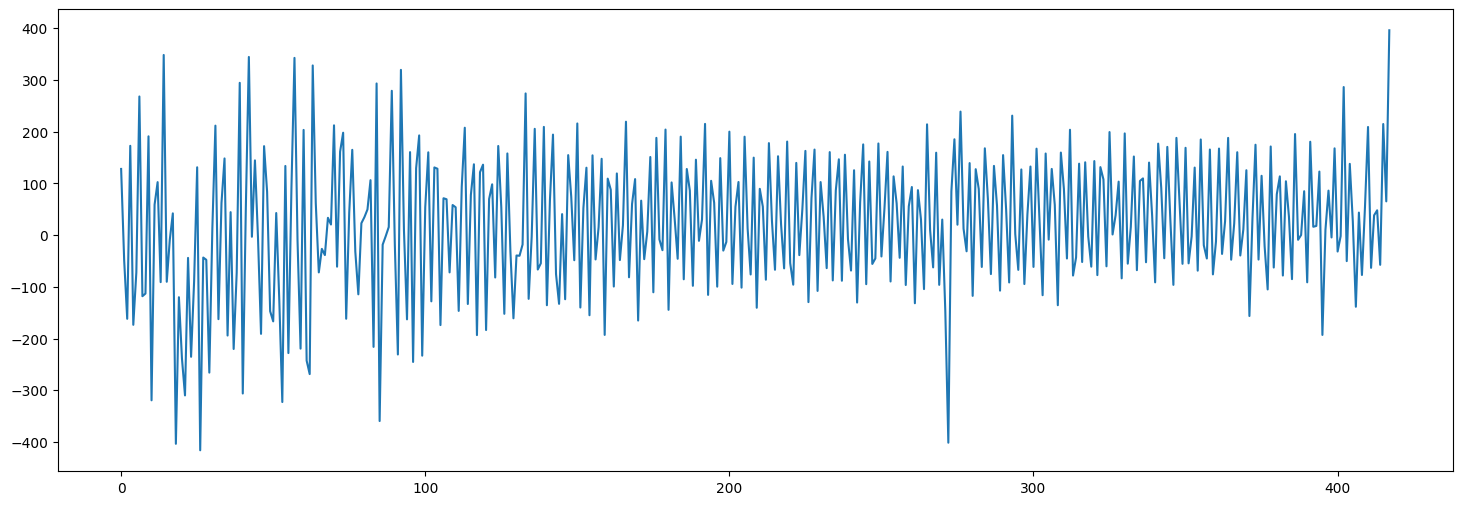

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
s1_sparse['Fp2'].plot()
plt.show()

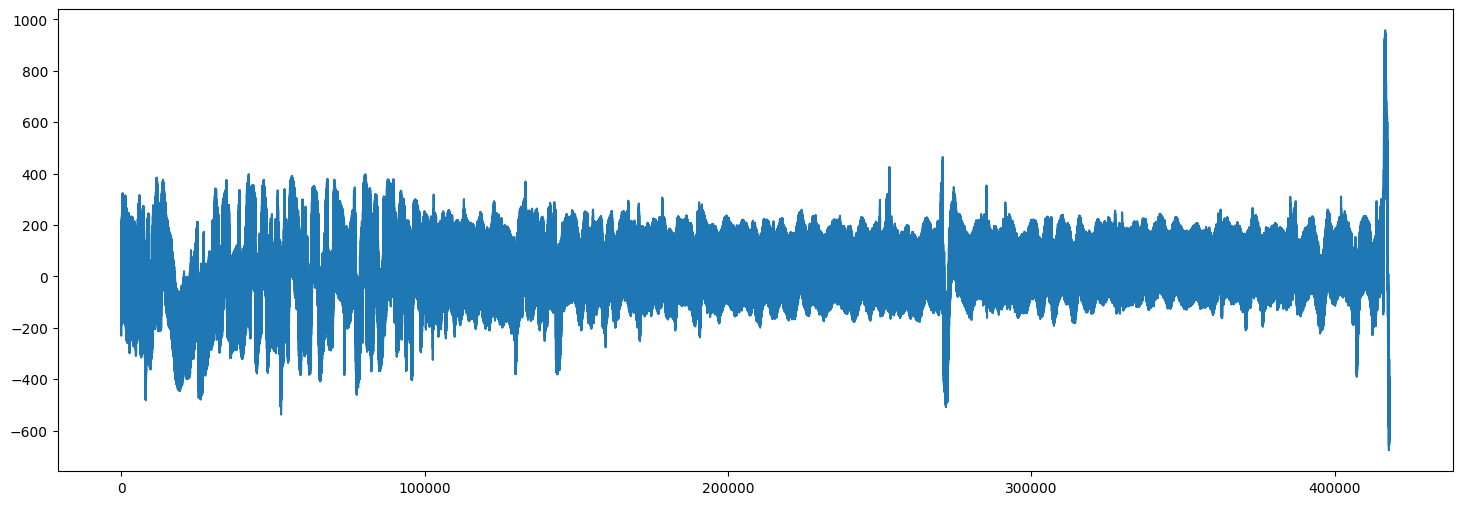

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
subject_1['Fp2'].plot()
plt.show()

## Finding Period of Oscillations

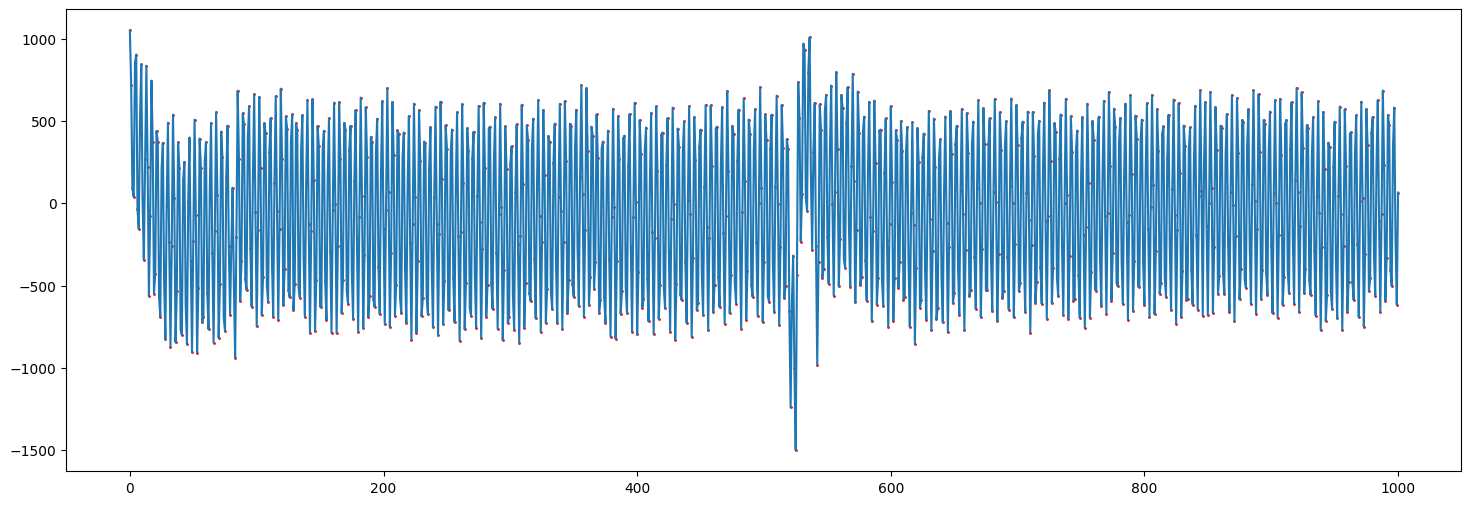

In [ ]:
import numpy as np

plt.figure(figsize=(18, 6))
s1_sparse['T7'].iloc[0:1001].plot()
plt.scatter(s1_sparse.index[0:1001], s1_sparse['T7'].iloc[0:1001], color='red', s=1)
plt.show()

Hypothesis: Subject's brain activity slowly decreases with novelty of the game.

## Take the Averages

In [ ]:
s1_sp_avgs = s1_sparse.copy()

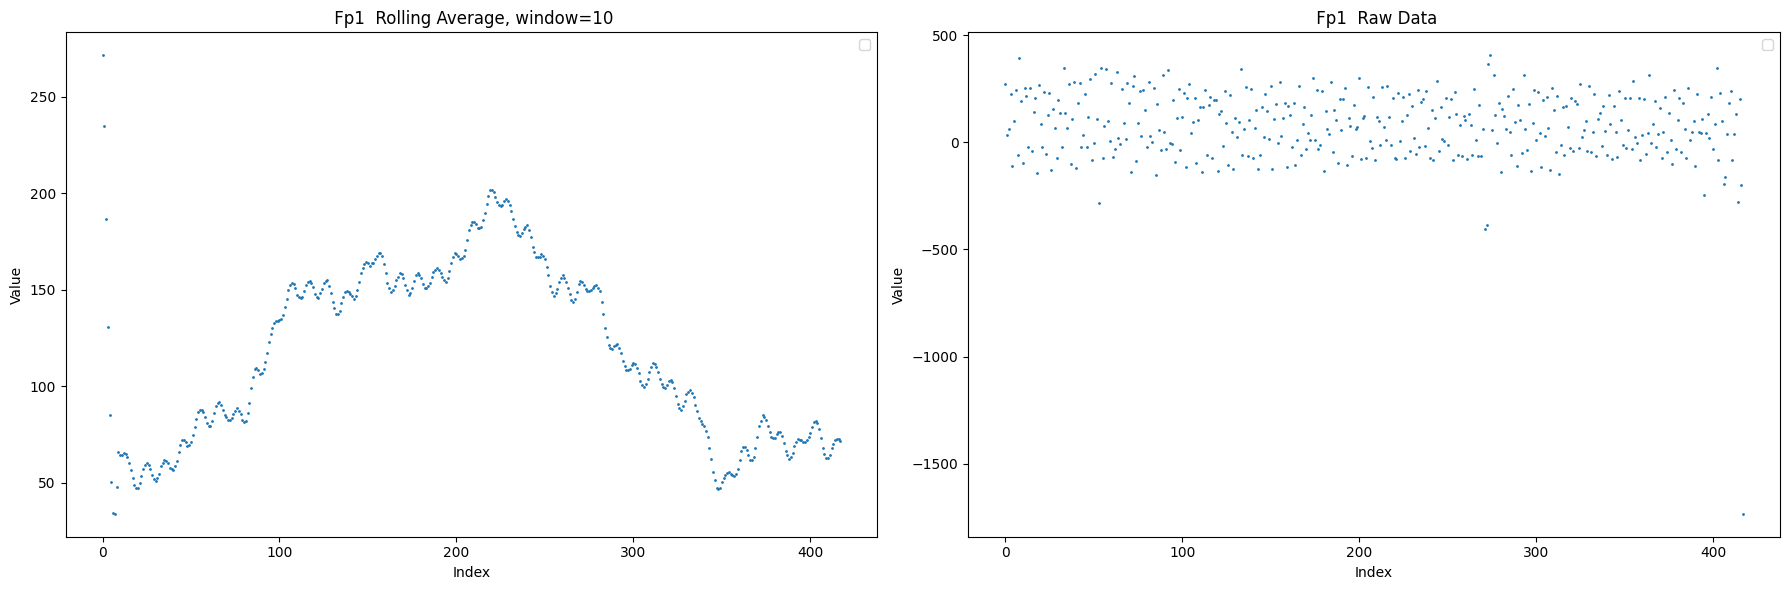

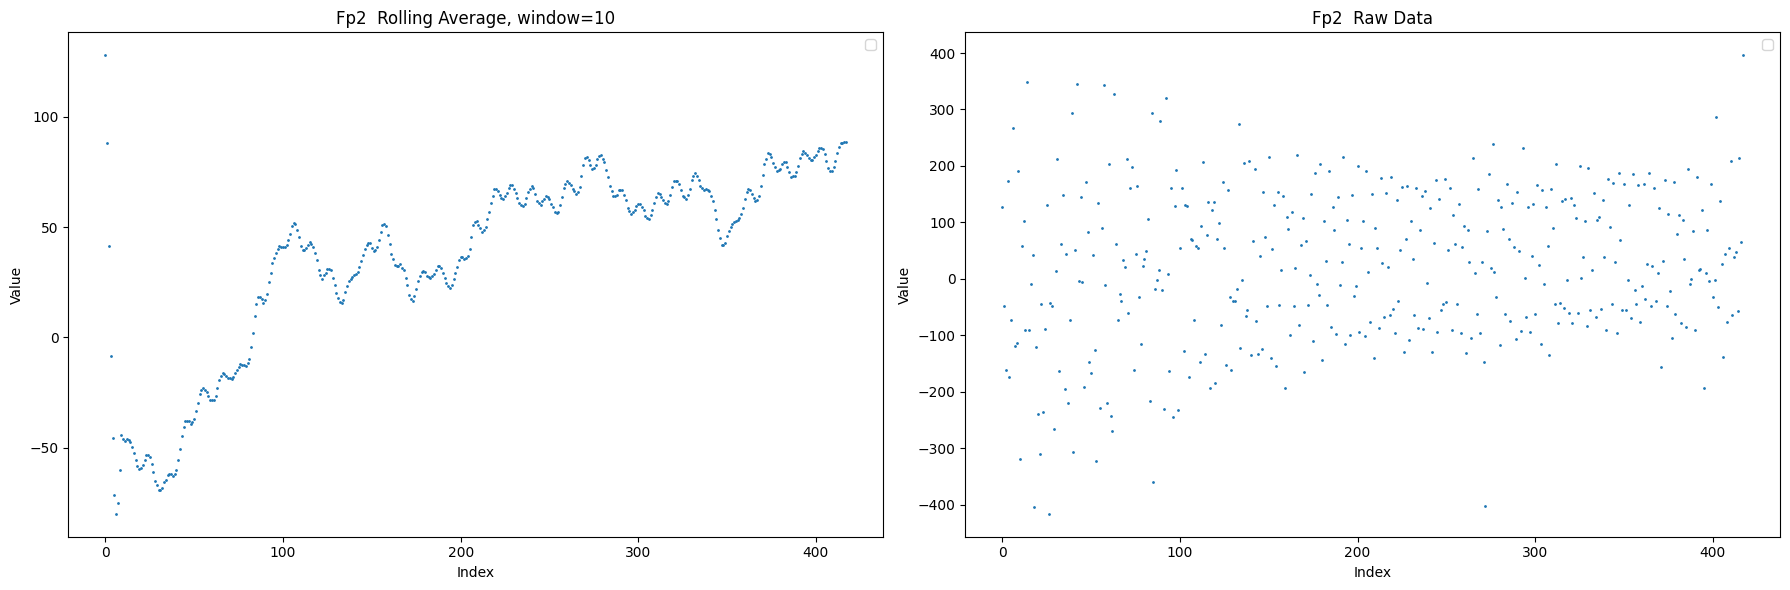

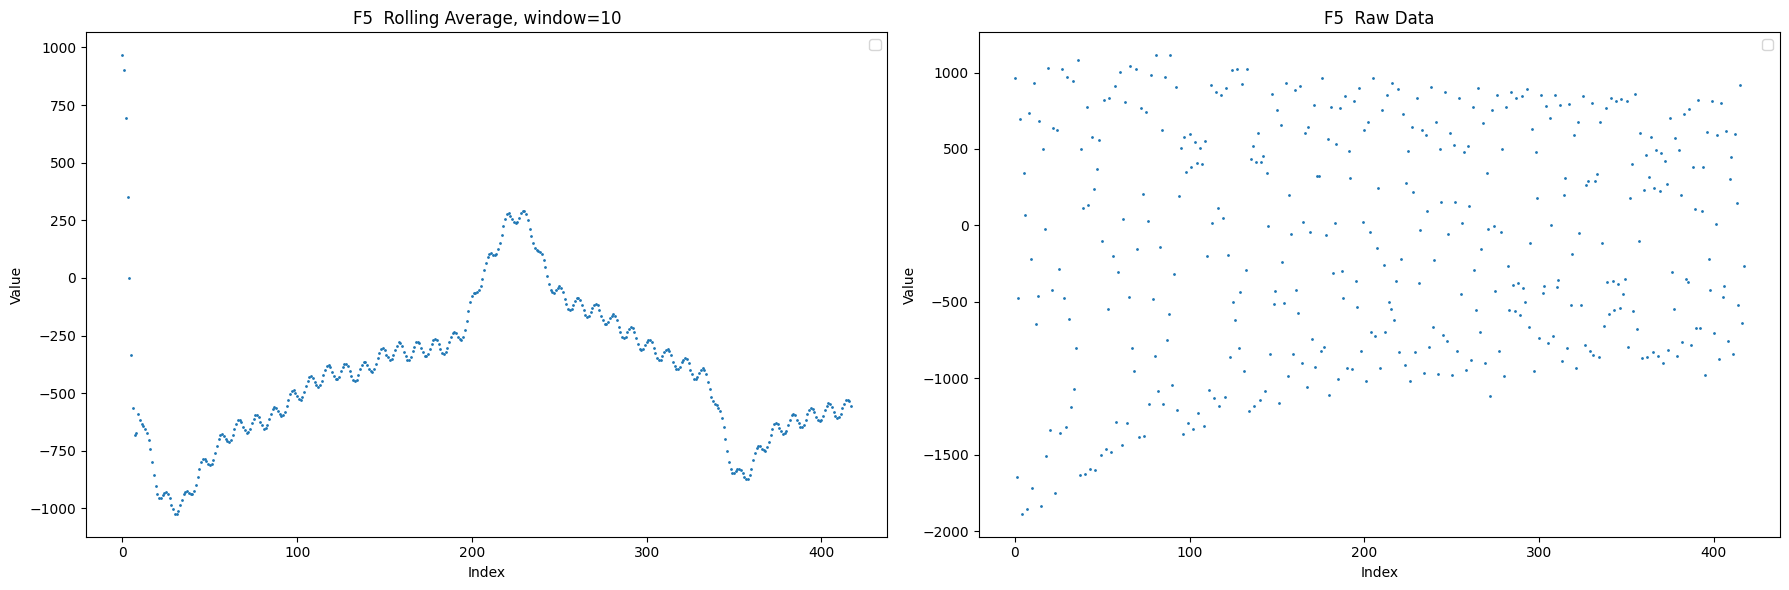

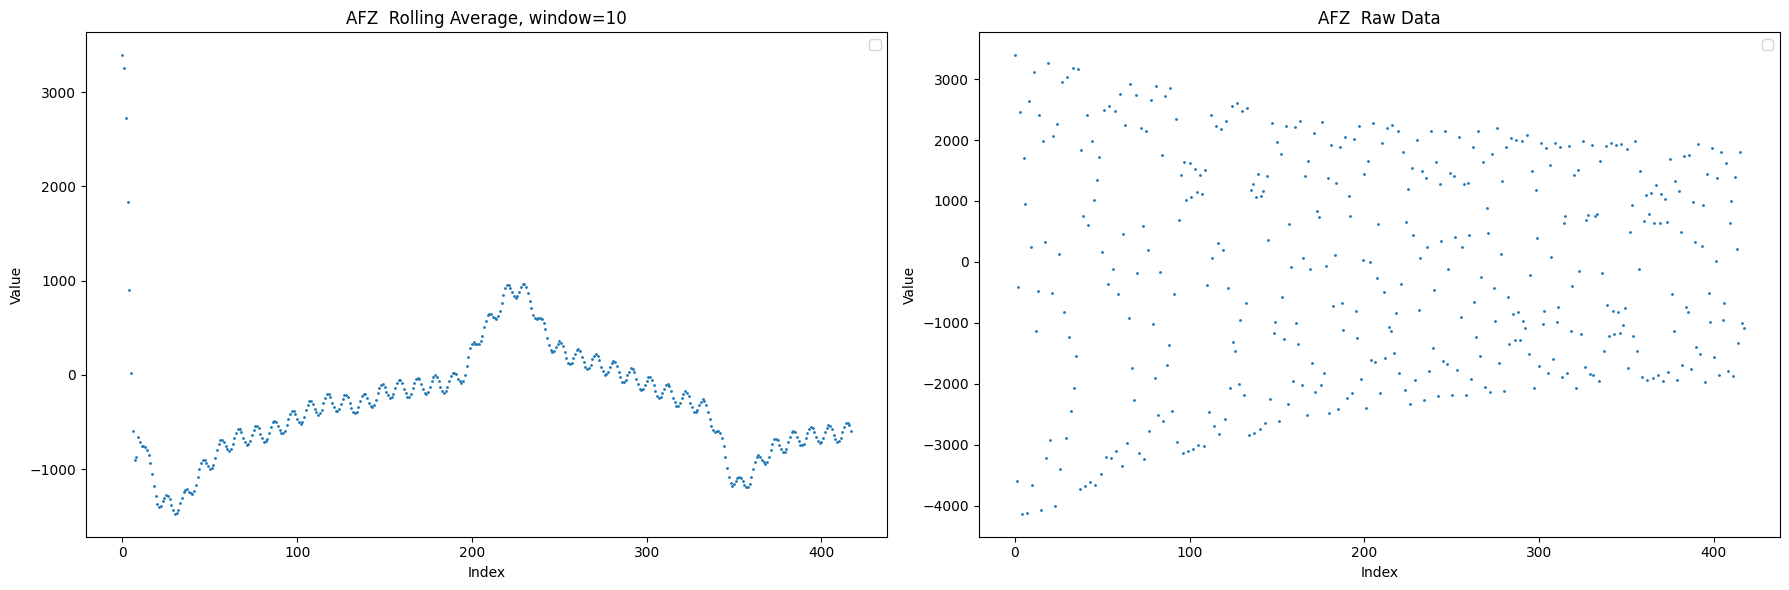

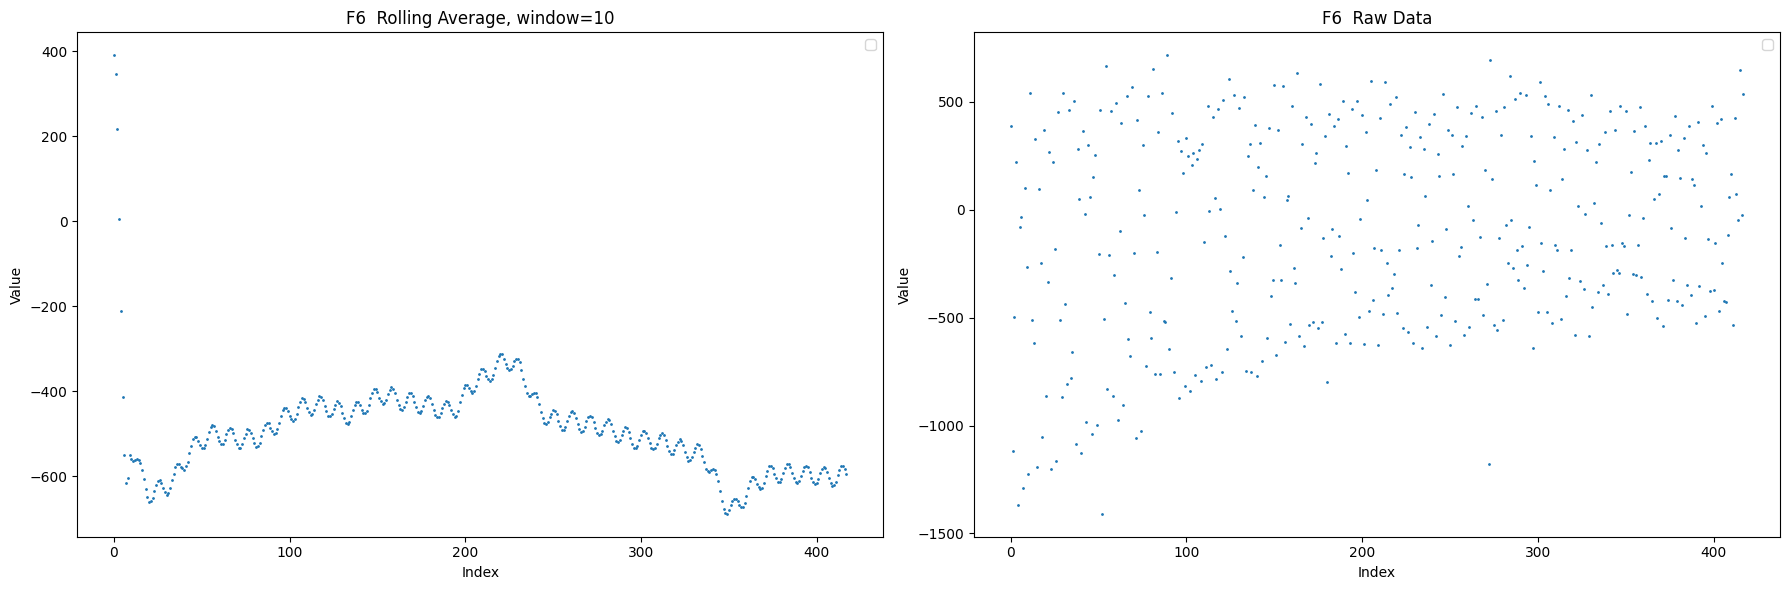

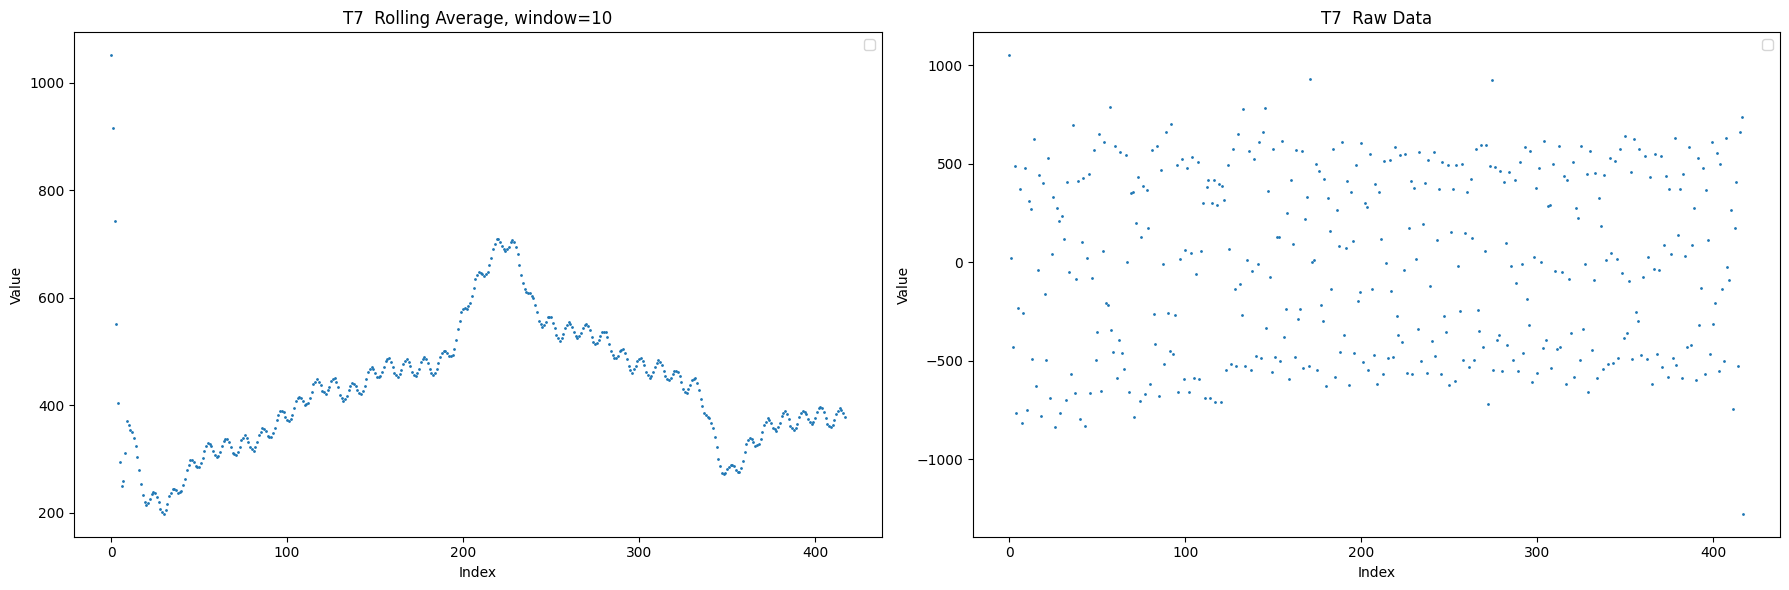

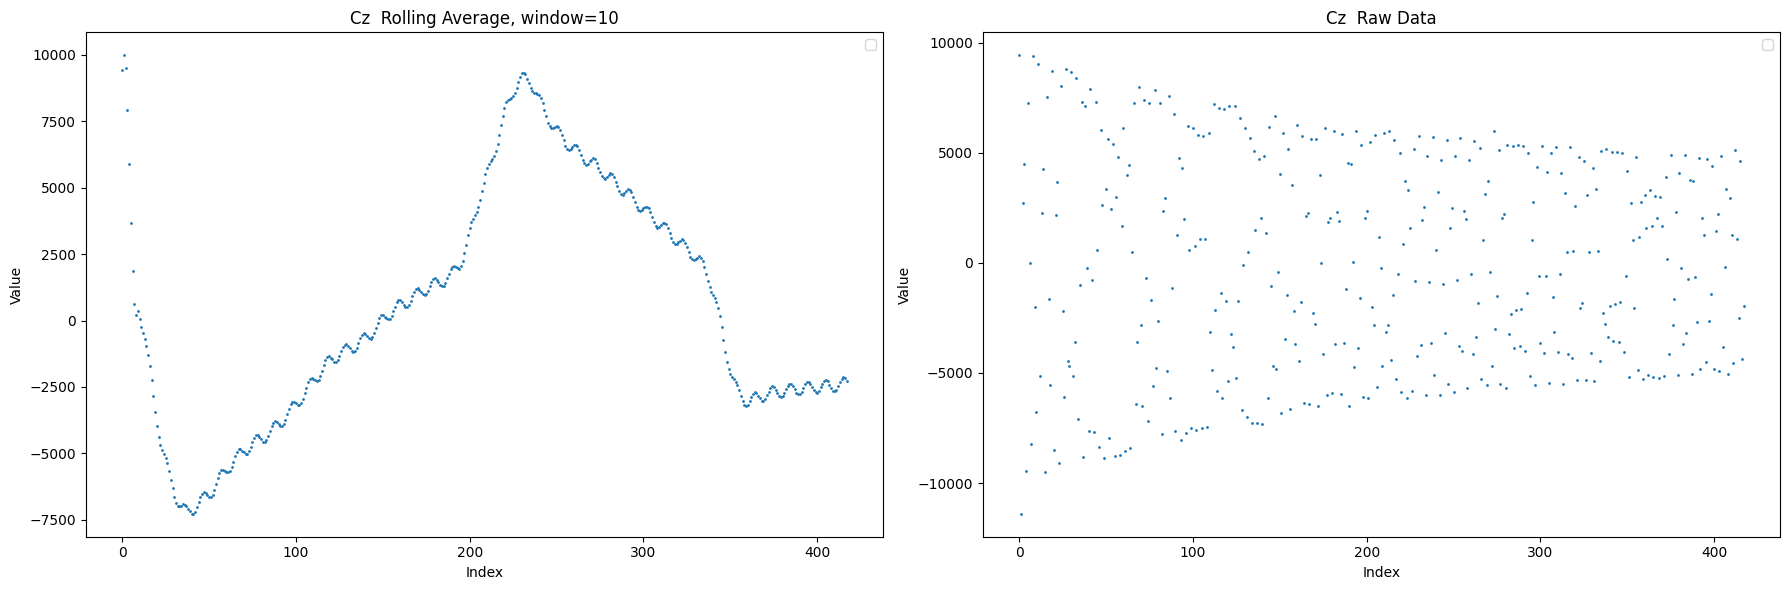

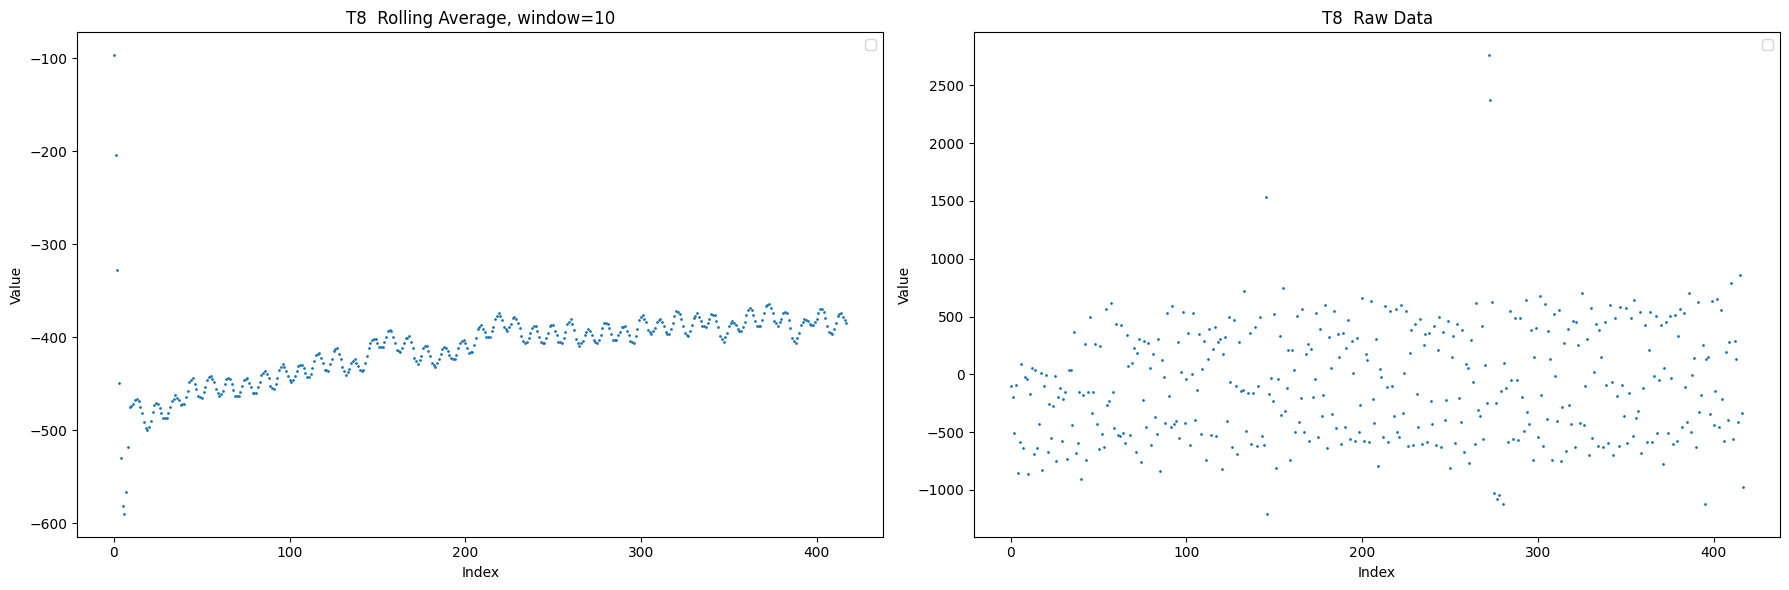

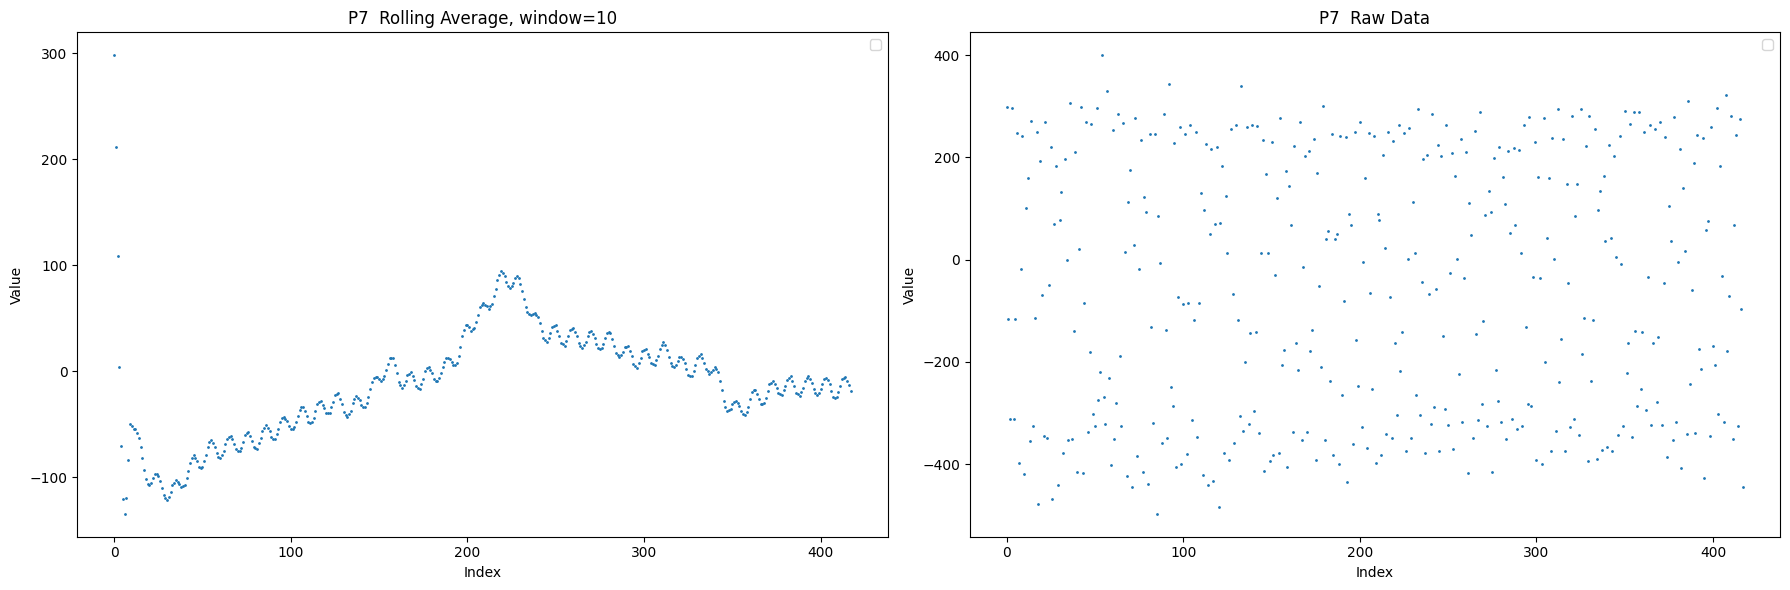

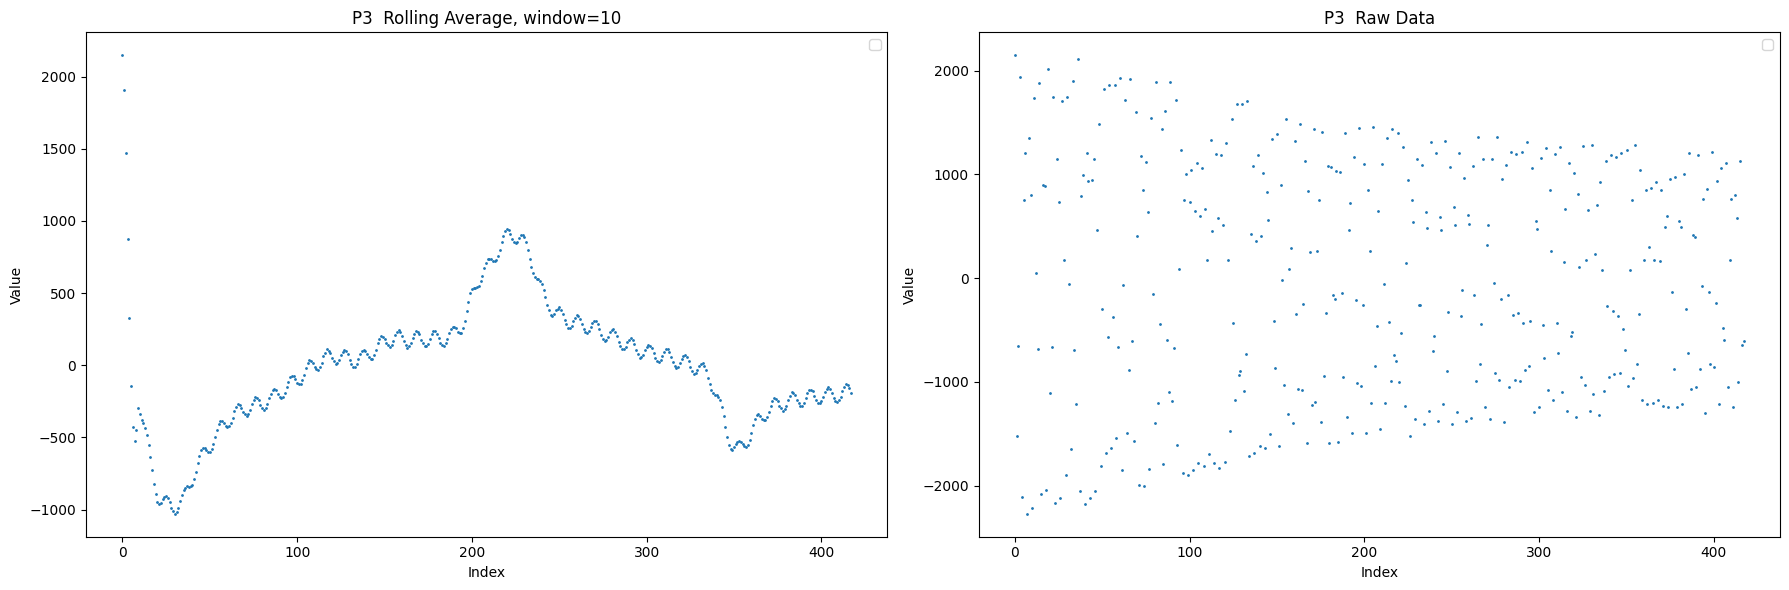

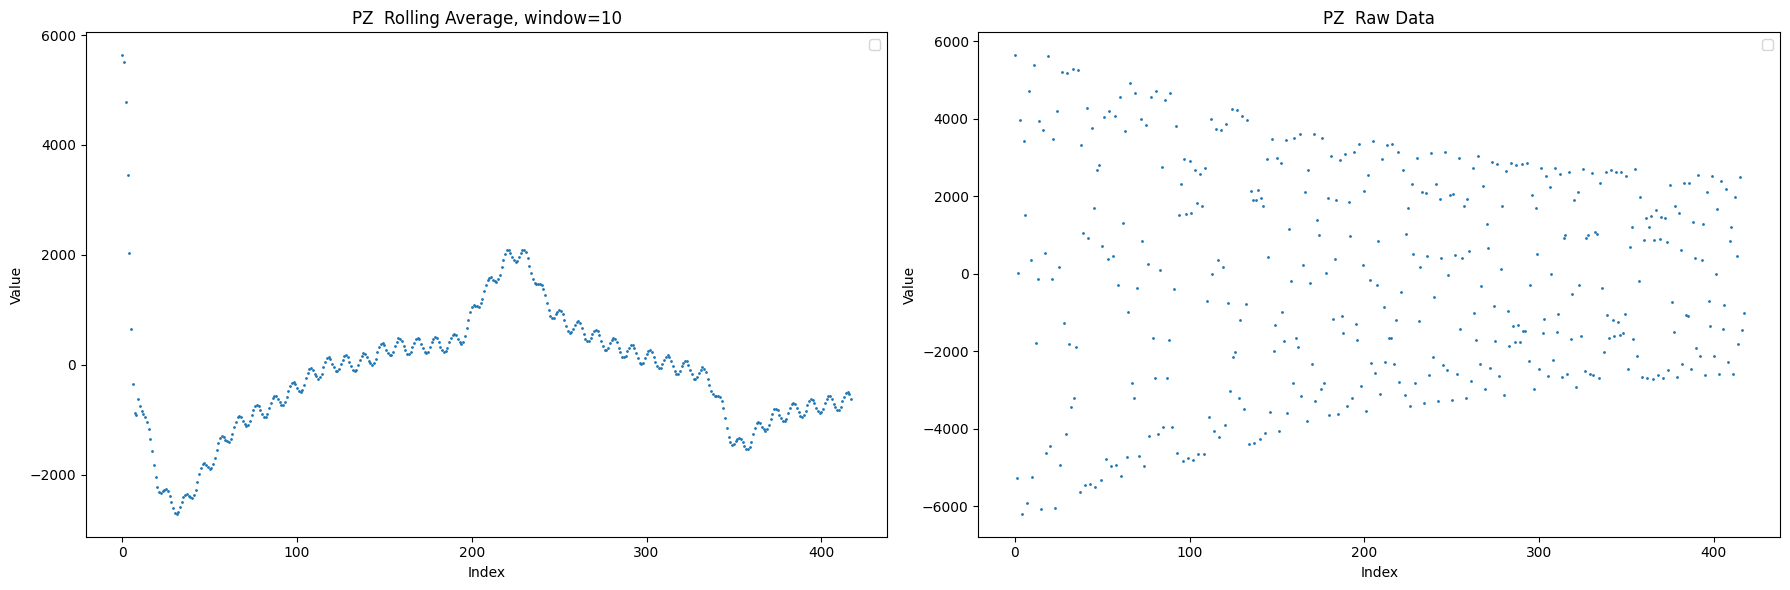

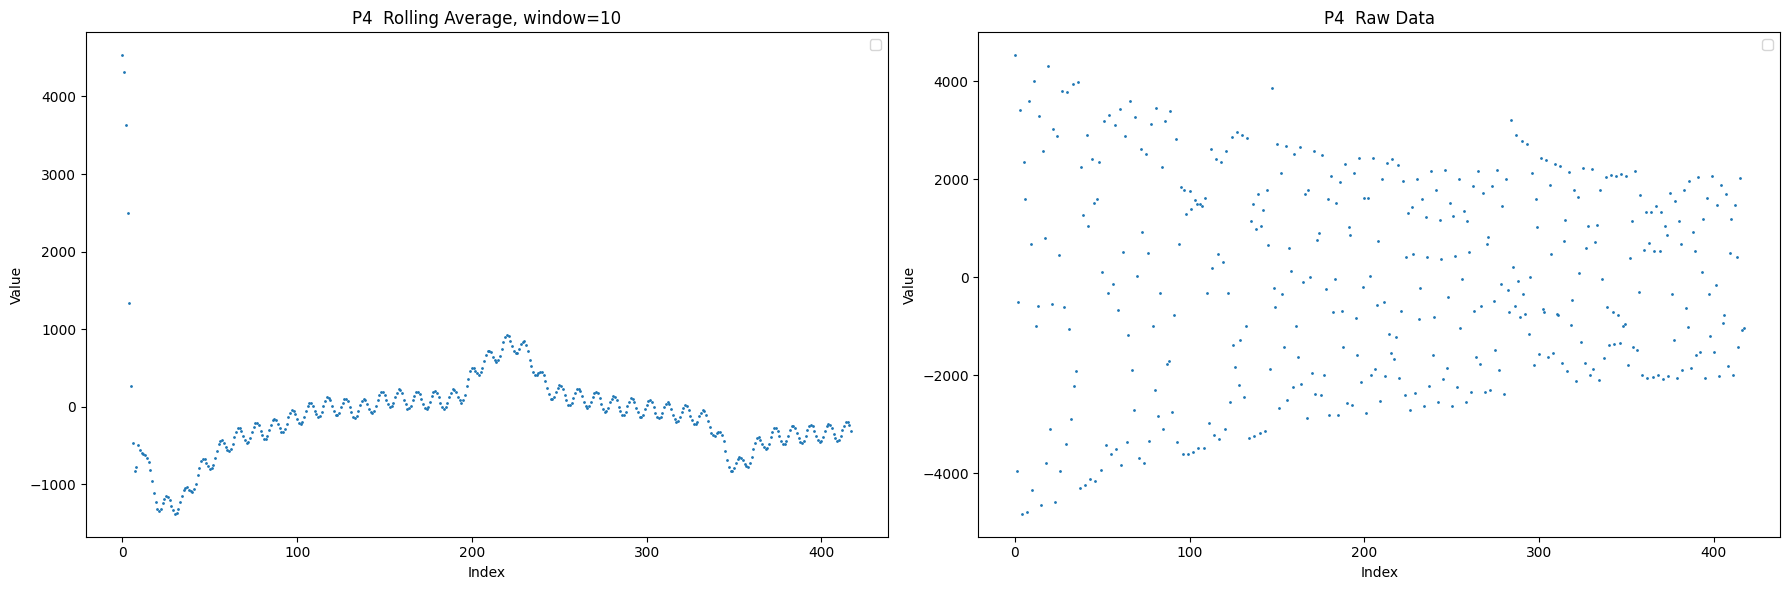

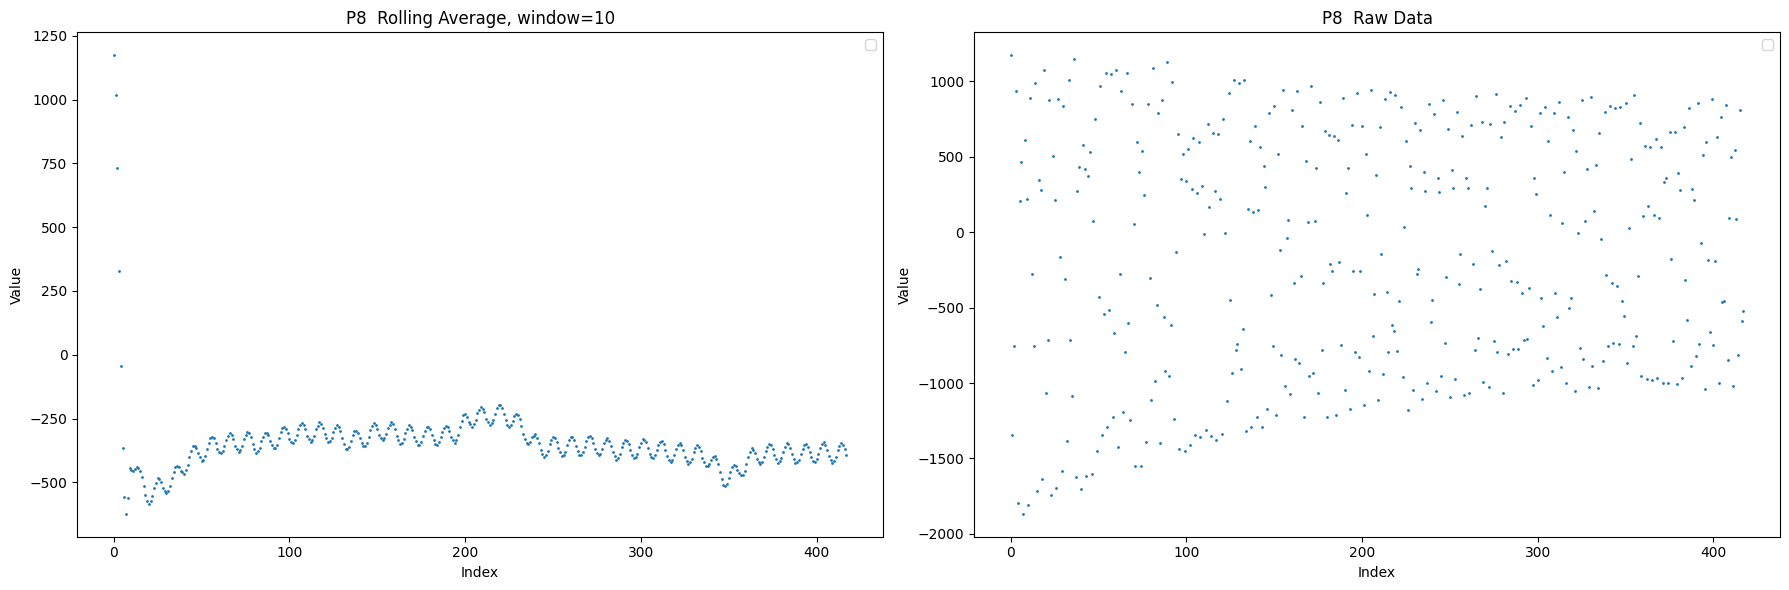

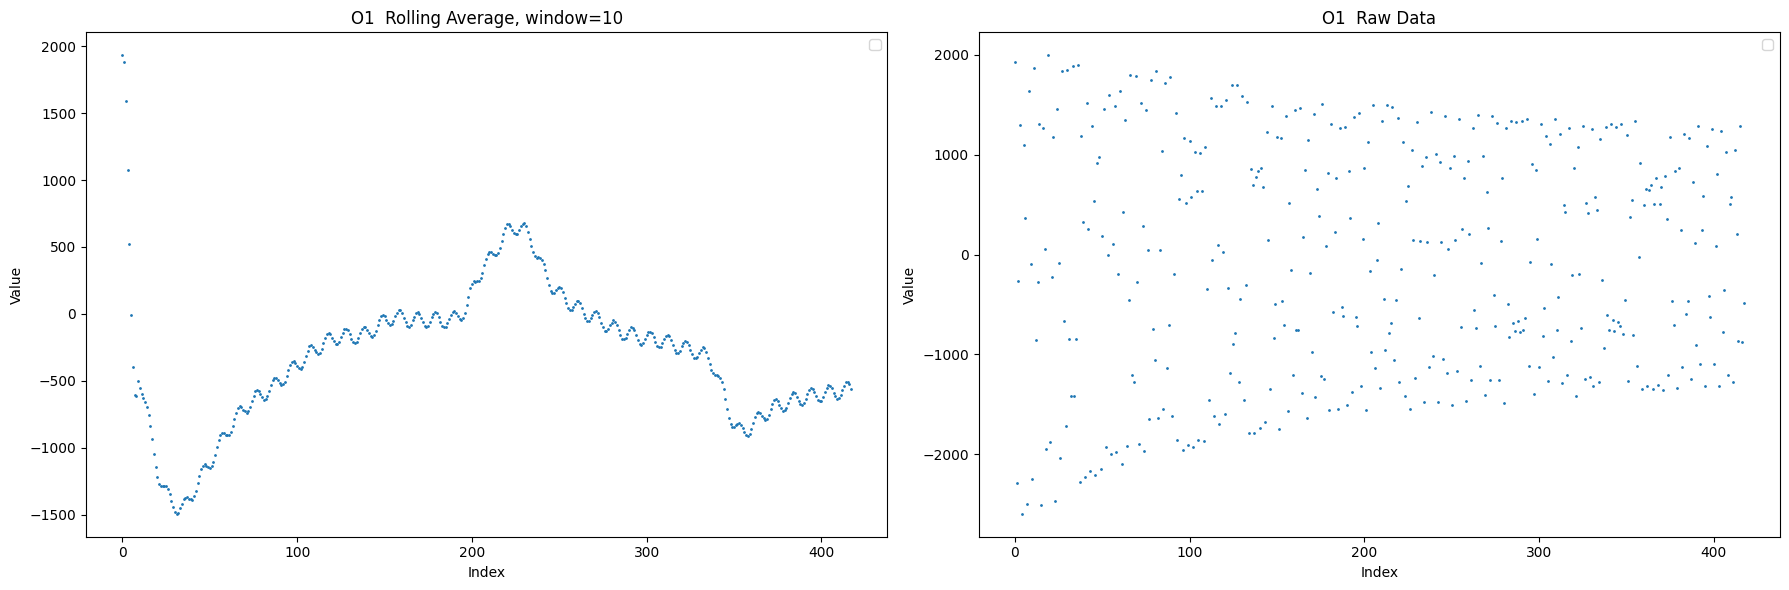

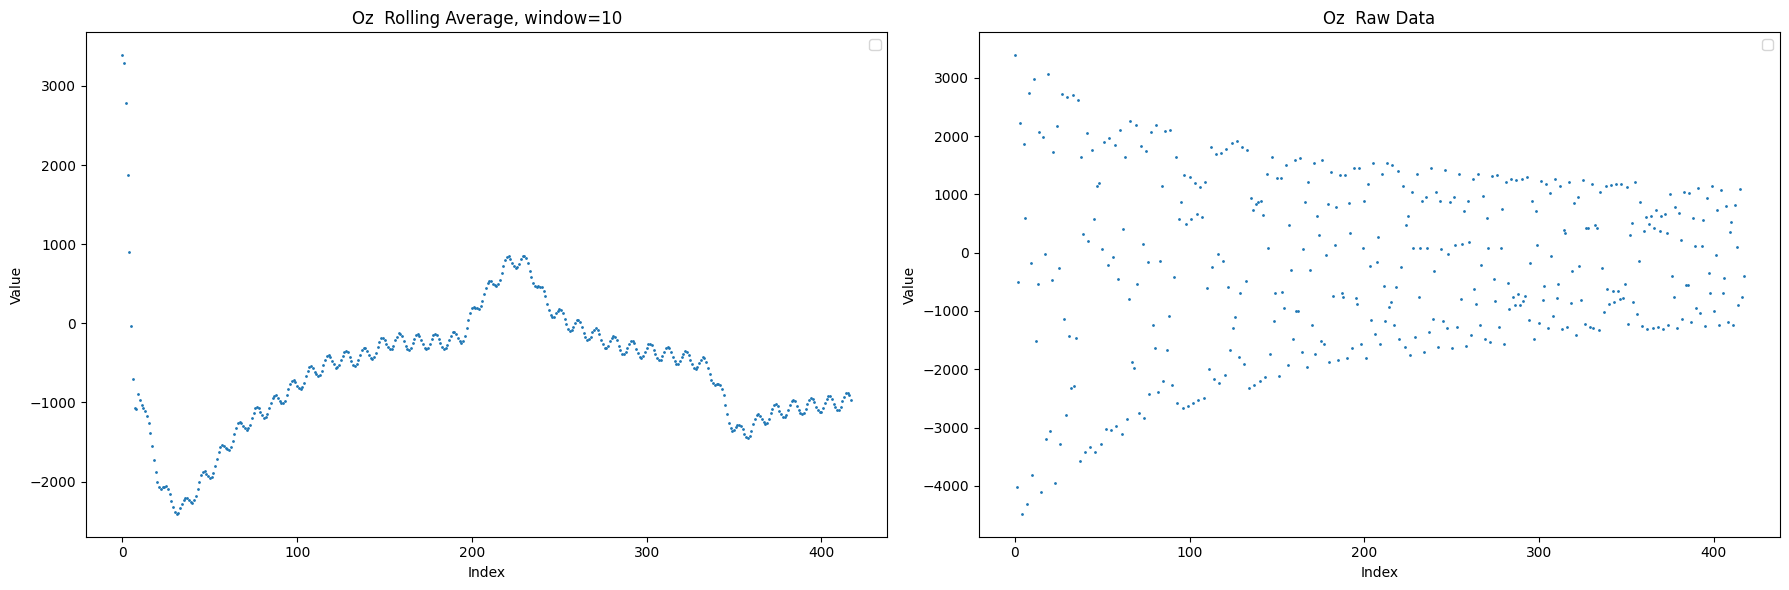

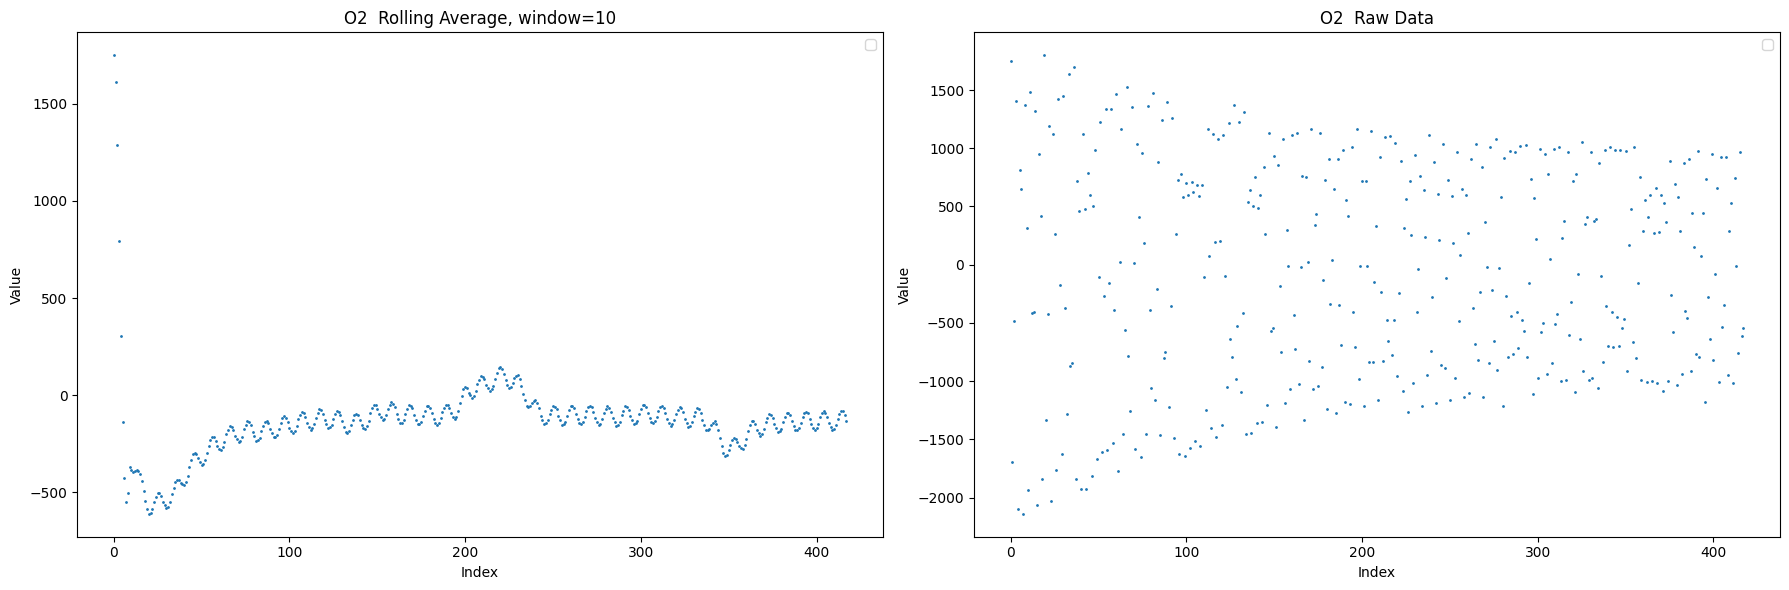

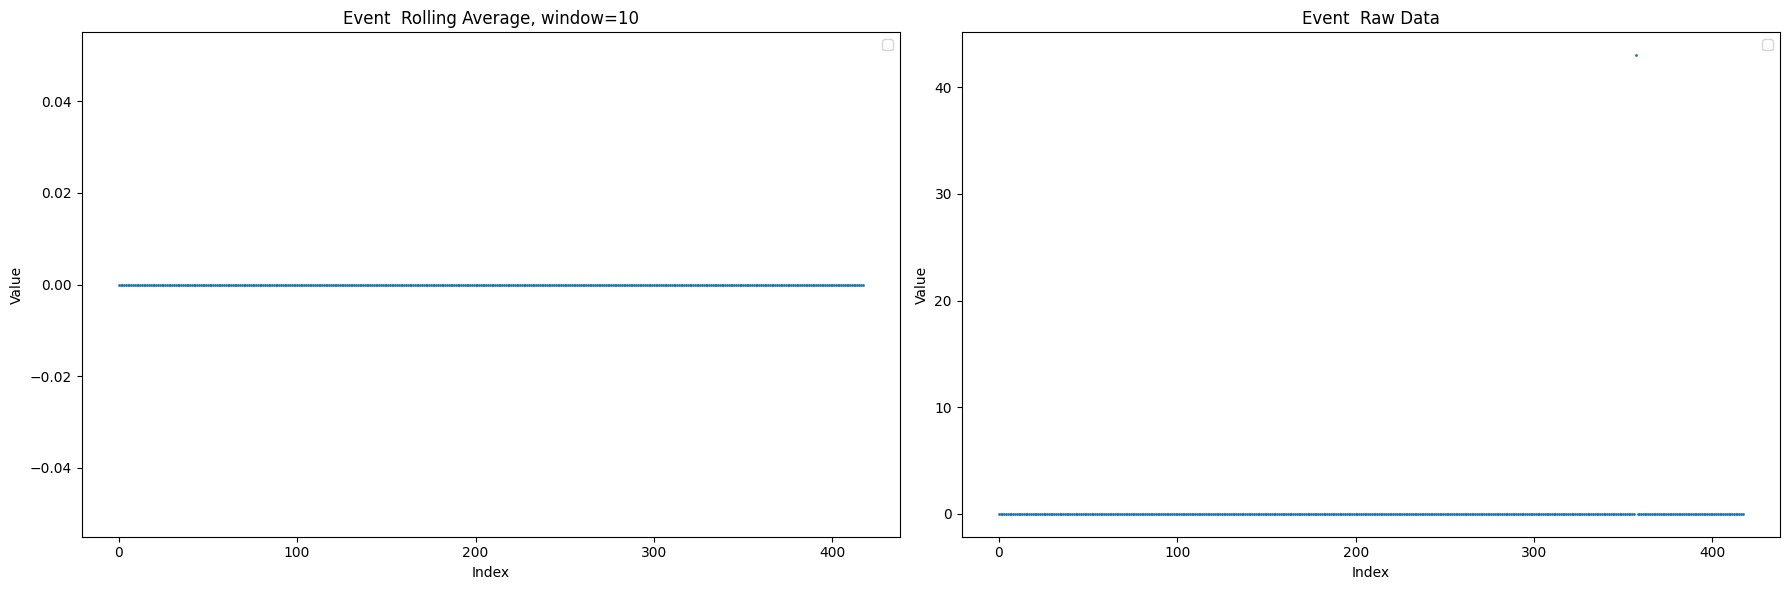

In [ ]:
# Assume subject_1 and s1_sp_avgs are already defined

AVG_WINDOW = 10

# Iterate through channels
for label in labels[1:18]:
    entries = subject_1[label]

    # Calculate the rolling average over the specified window
    rolling_avg = entries.rolling(window=AVG_WINDOW, min_periods=1).mean()

    # Replace the original entries with the rolling average
    s1_sp_avgs[label] = rolling_avg

    # Optional: print progress
    #print(f'Processed channel: {label}')

# Display the result
#print(s1_sp_avgs)

for label in labels[1:18]:
  fig, axes = plt.subplots(1, 2, figsize=(18, 6))

  # Plot on the first subplot
  axes[0].scatter(s1_sp_avgs.index, s1_sp_avgs[label],s=1)
  axes[0].set_title(label+'  Rolling Average, window='+str(AVG_WINDOW))
  axes[0].set_xlabel('Index')
  axes[0].set_ylabel('Value')
  axes[0].legend()

  # Plot on the second subplot
  axes[1].scatter(s1_sparse.index, s1_sparse[label],s=1)
  axes[1].set_title(label+'  Raw Data')
  axes[1].set_xlabel('Index')
  axes[1].set_ylabel('Value')
  axes[1].legend()

  # Show the plots
  plt.tight_layout()
  plt.show()

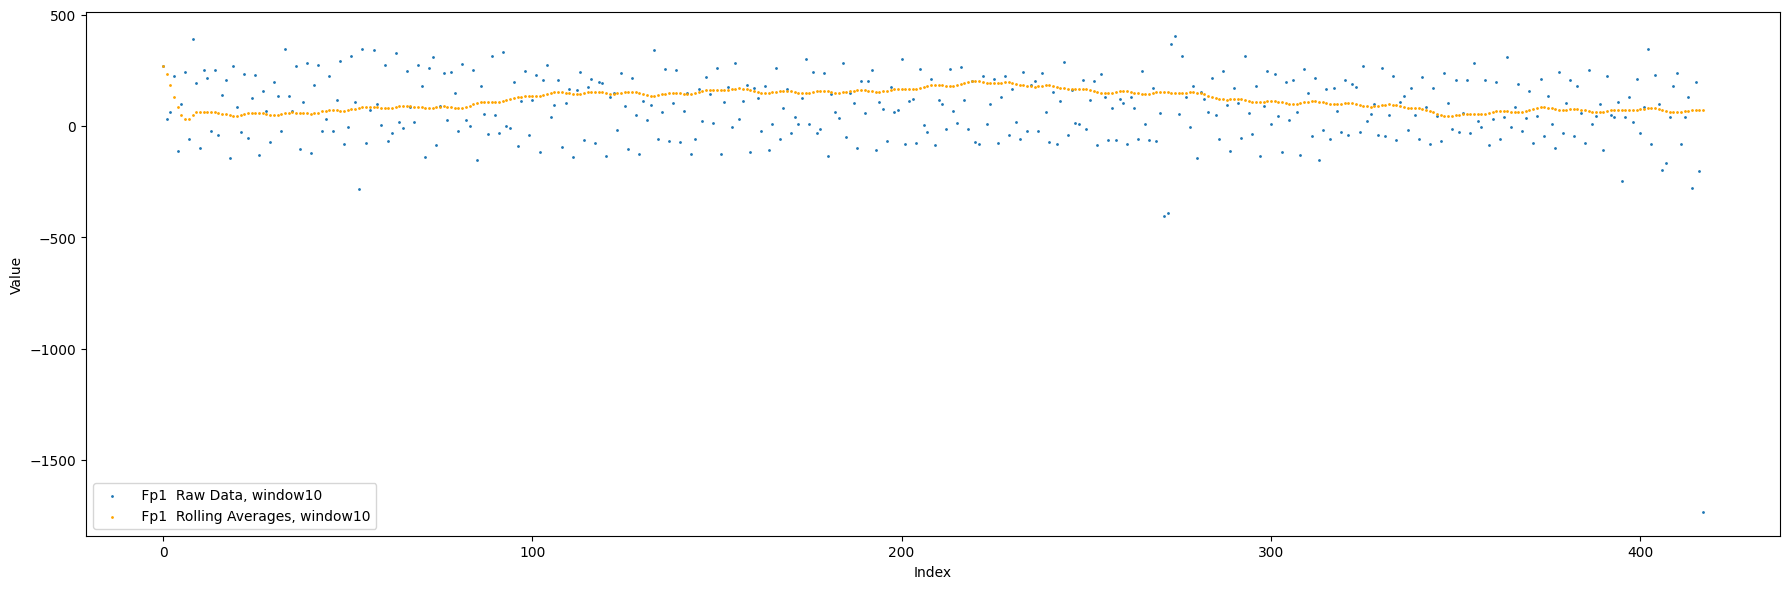

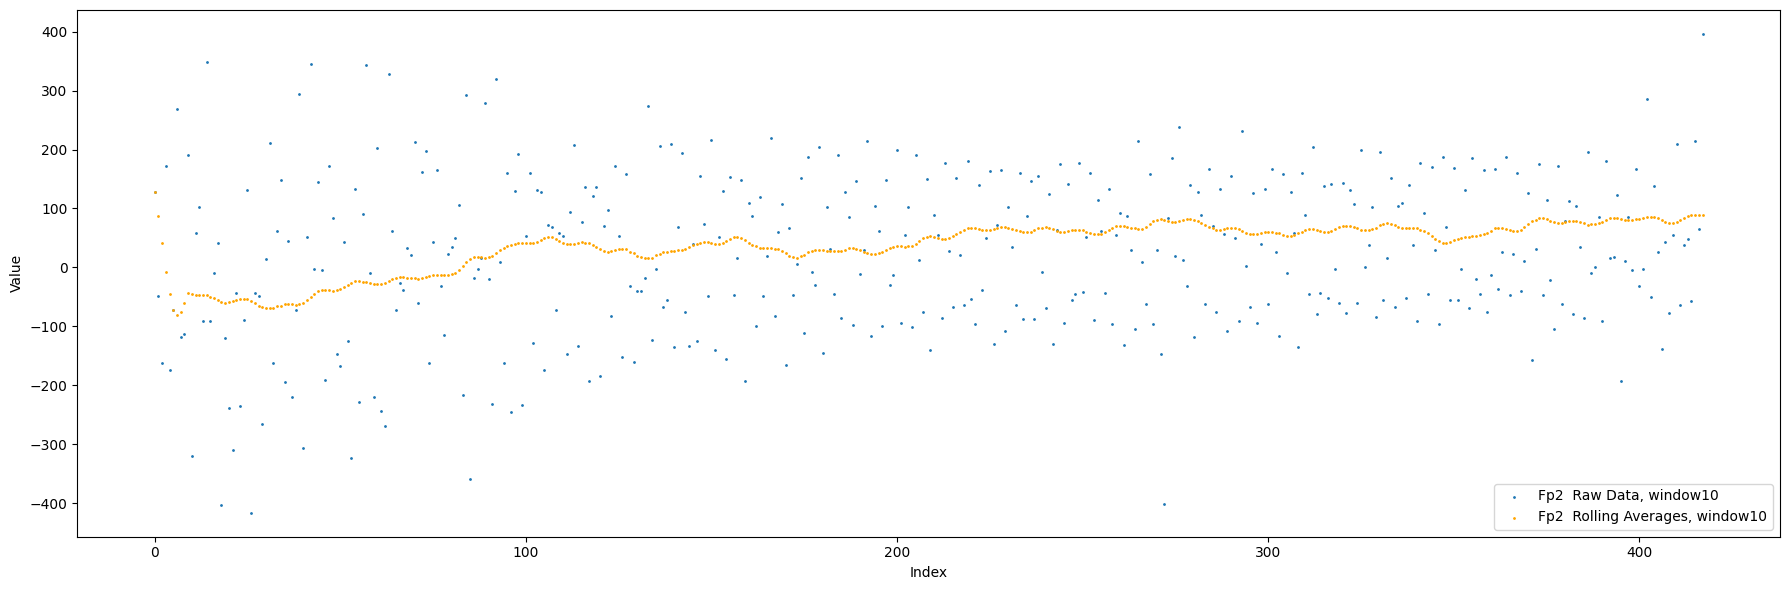

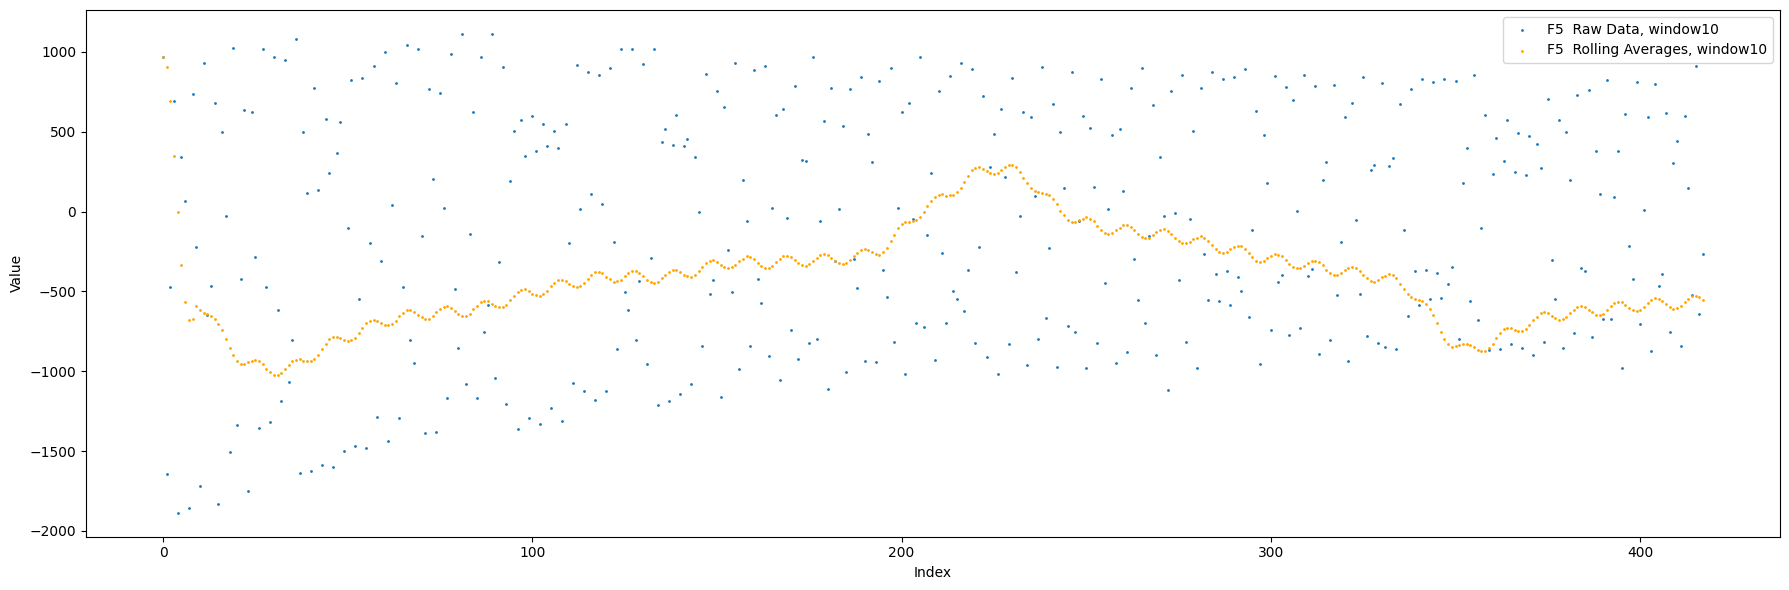

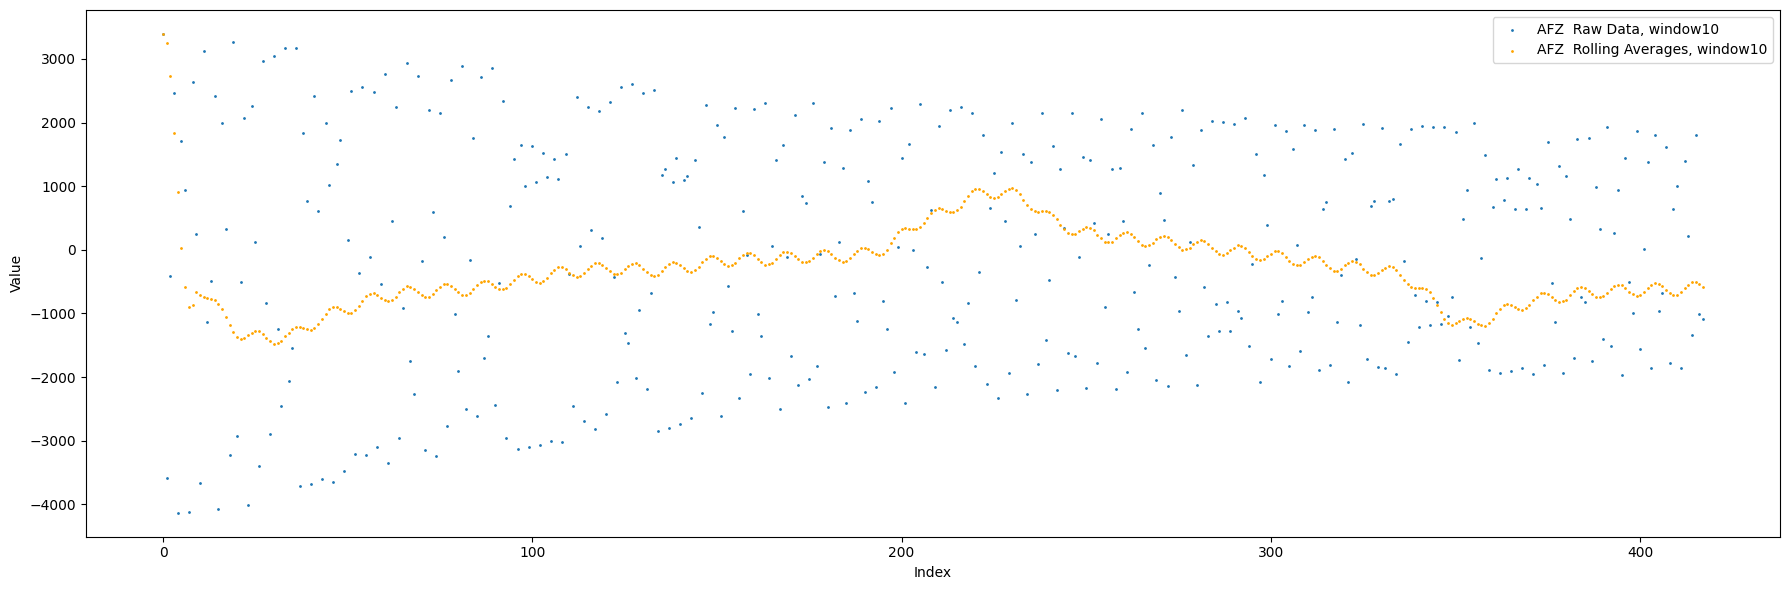

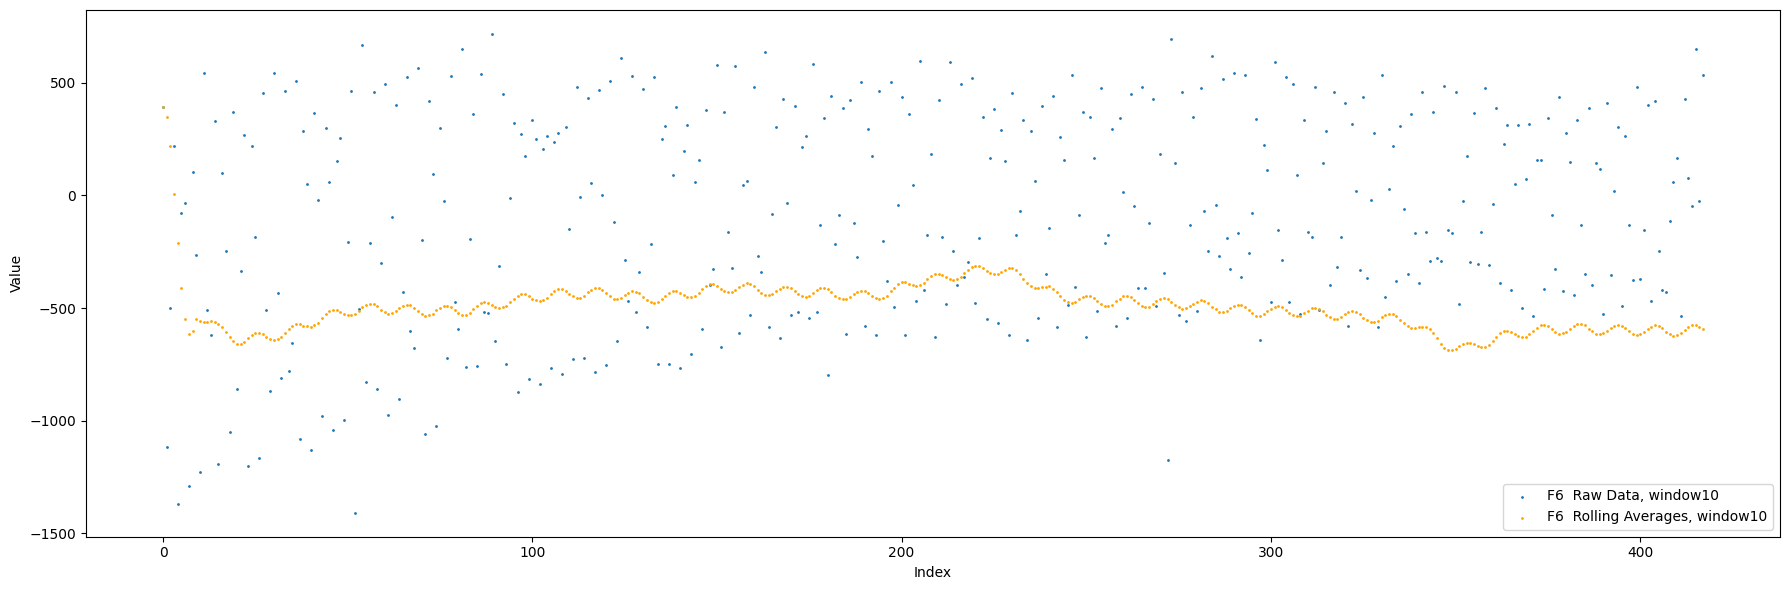

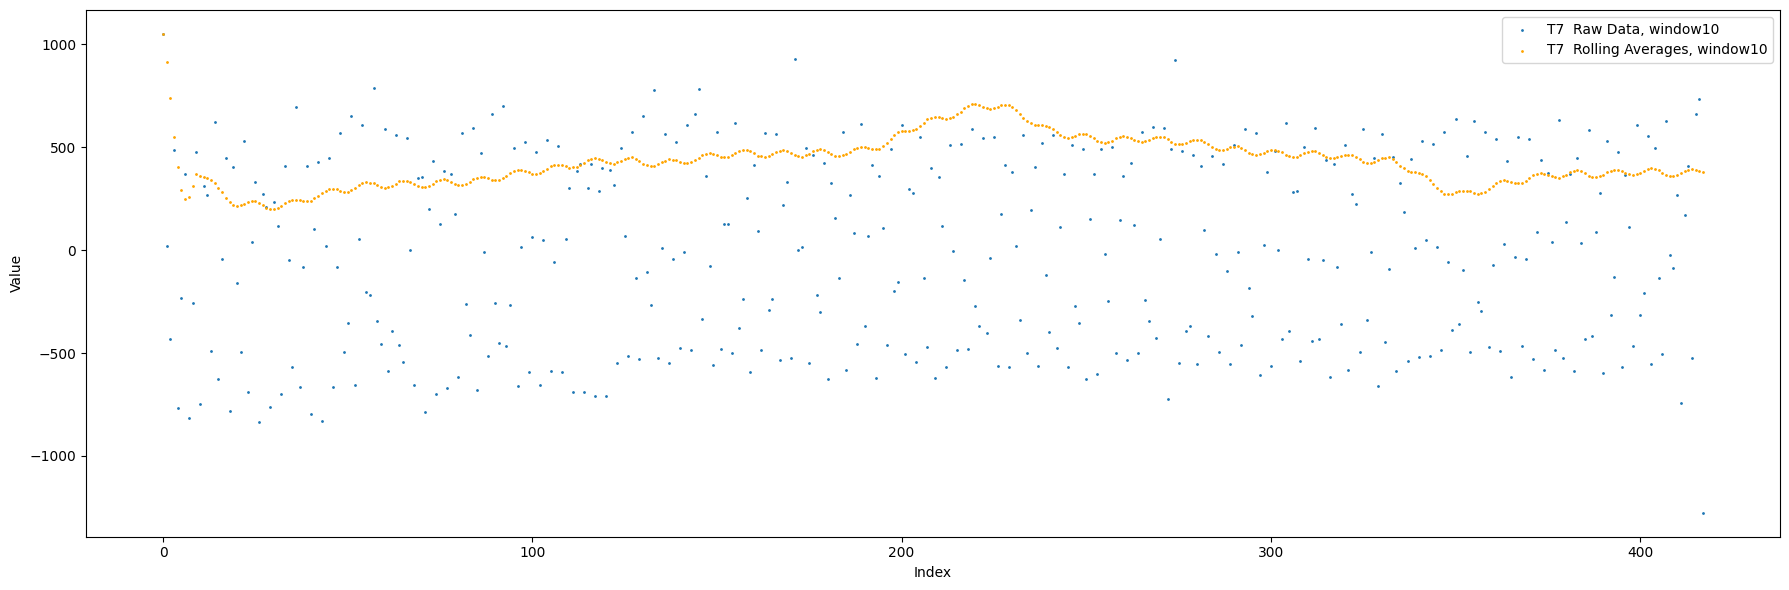

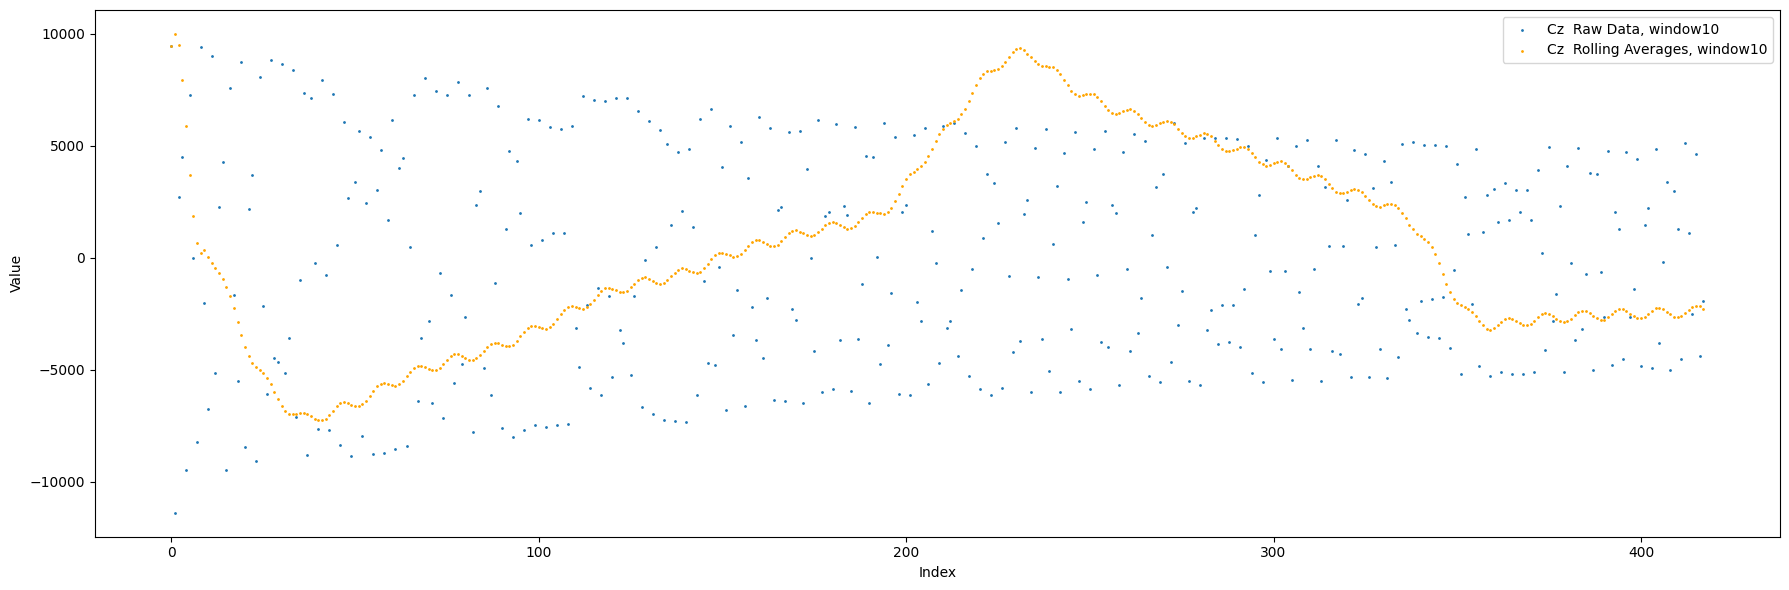

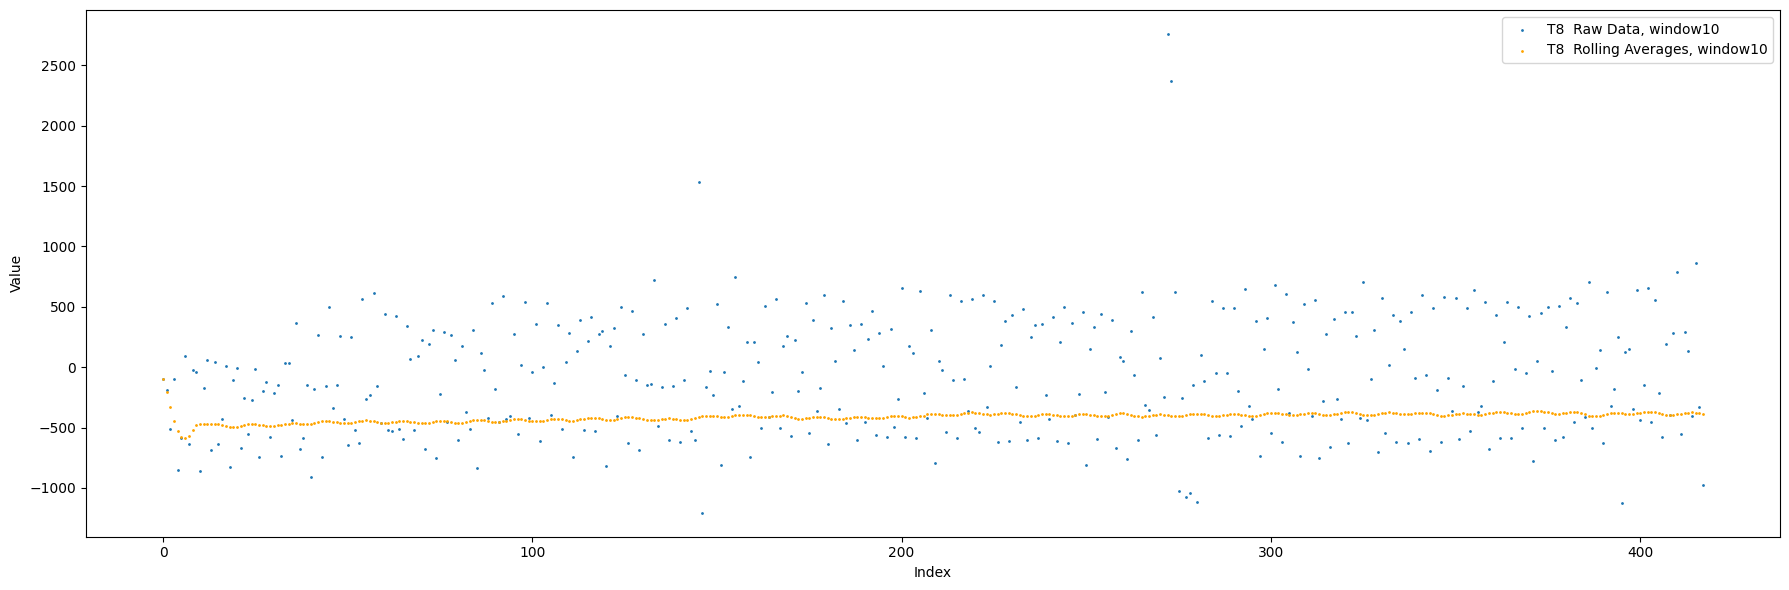

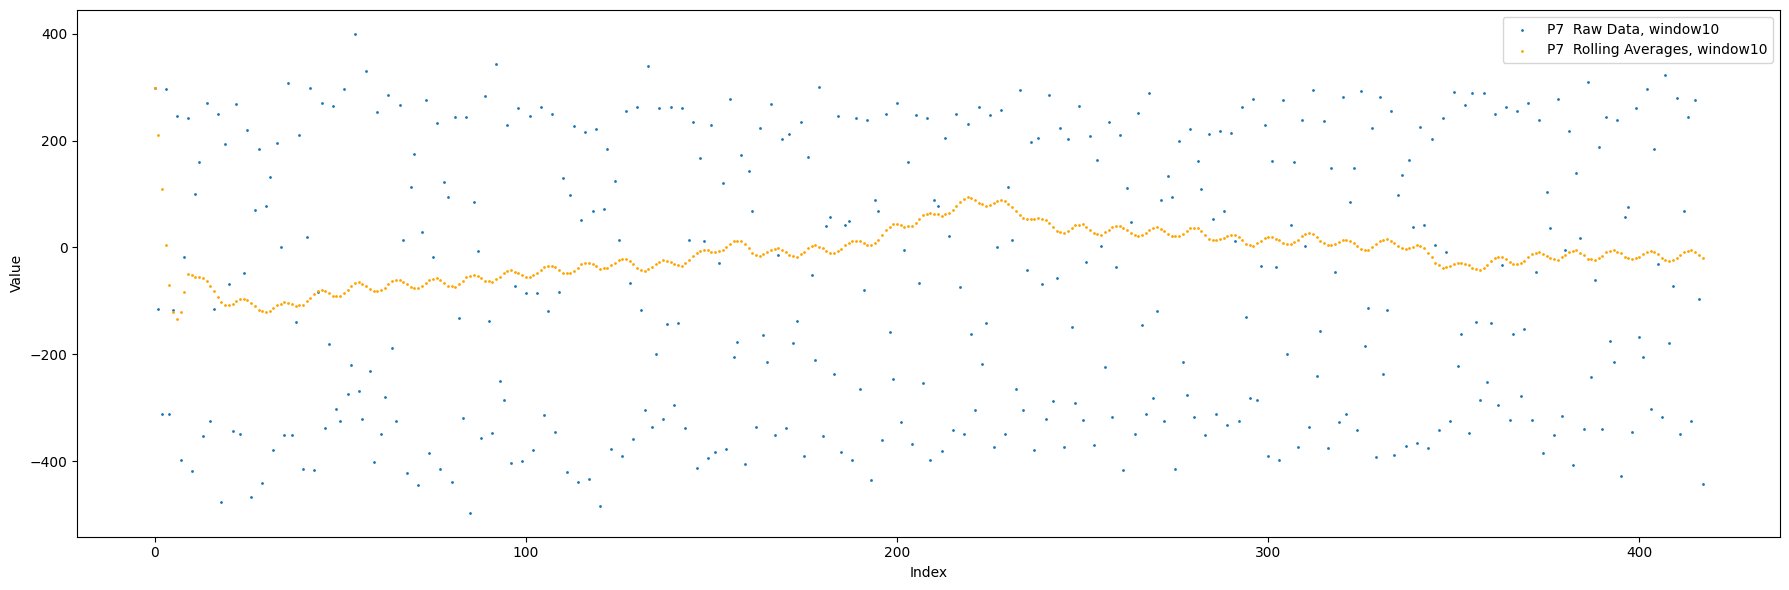

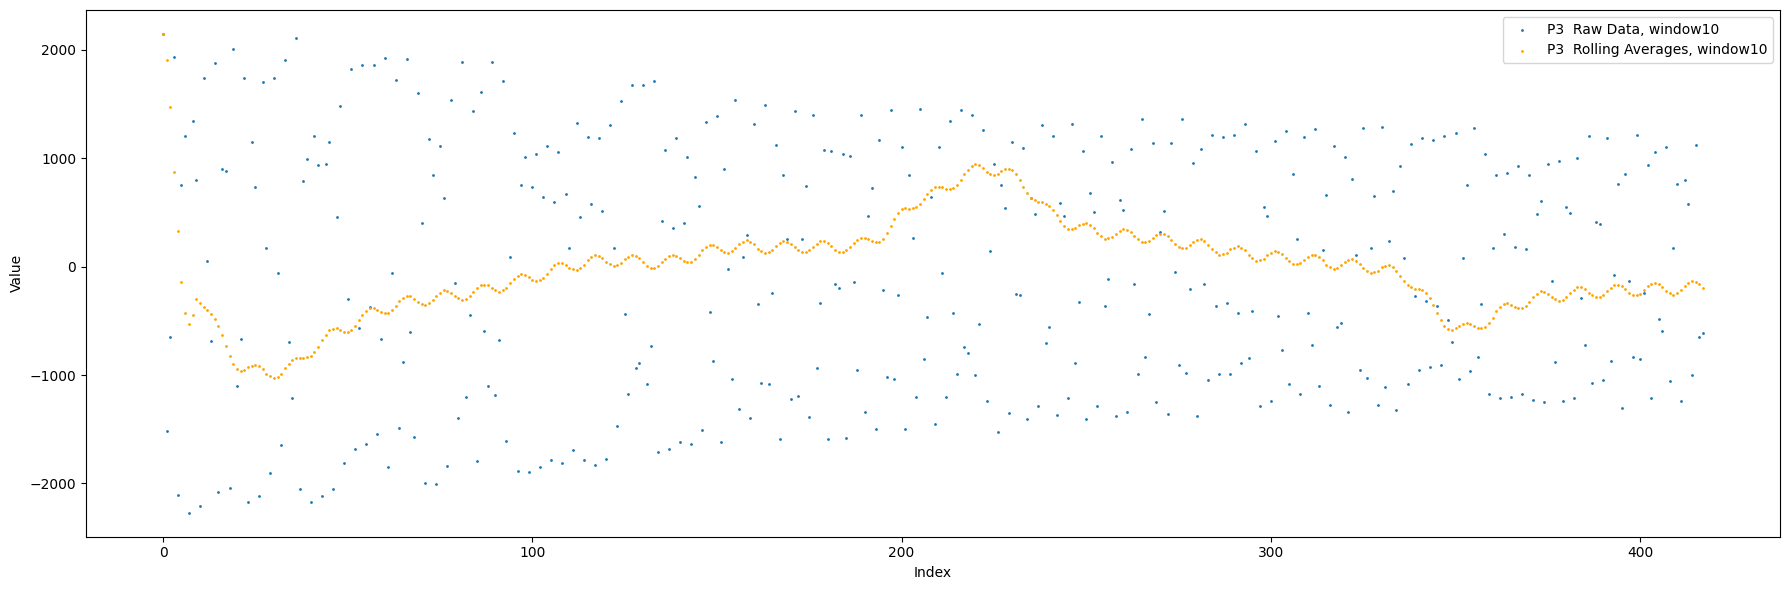

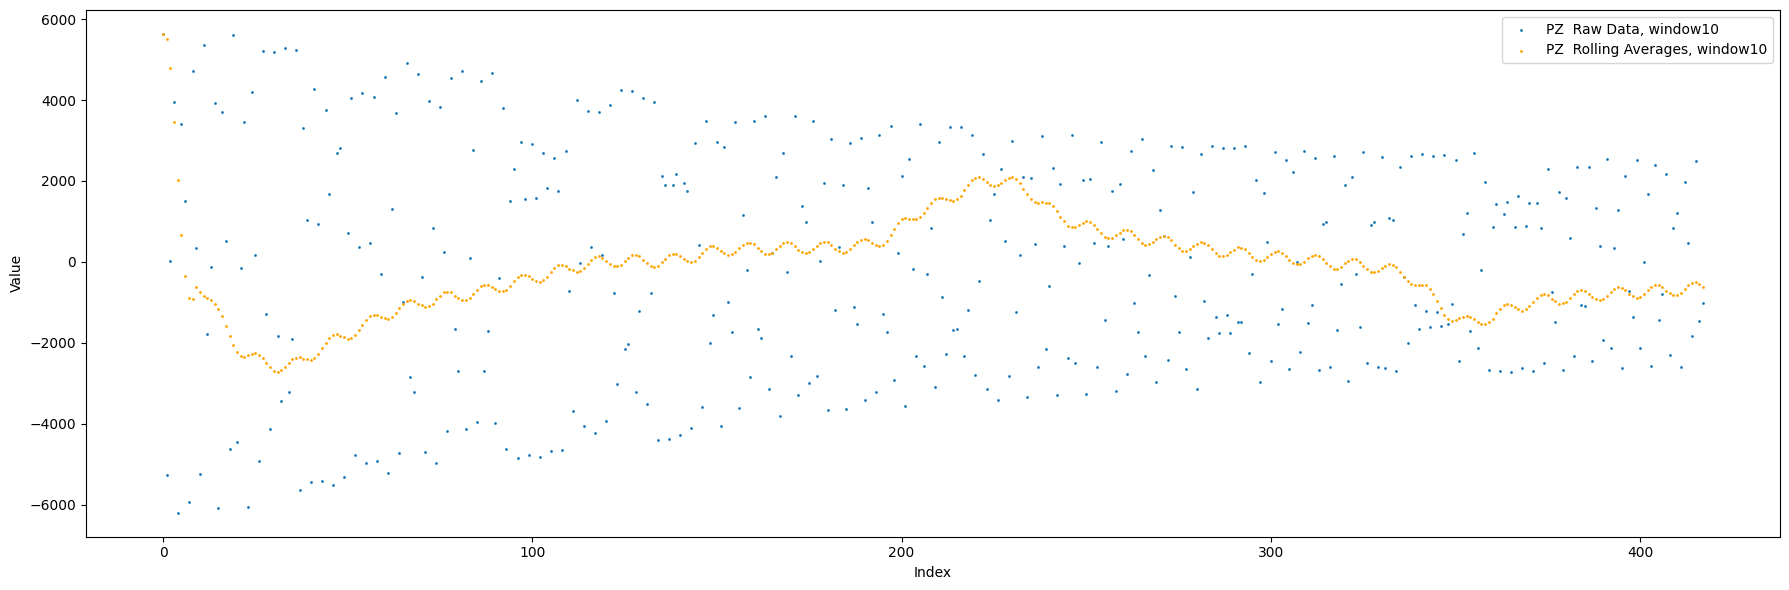

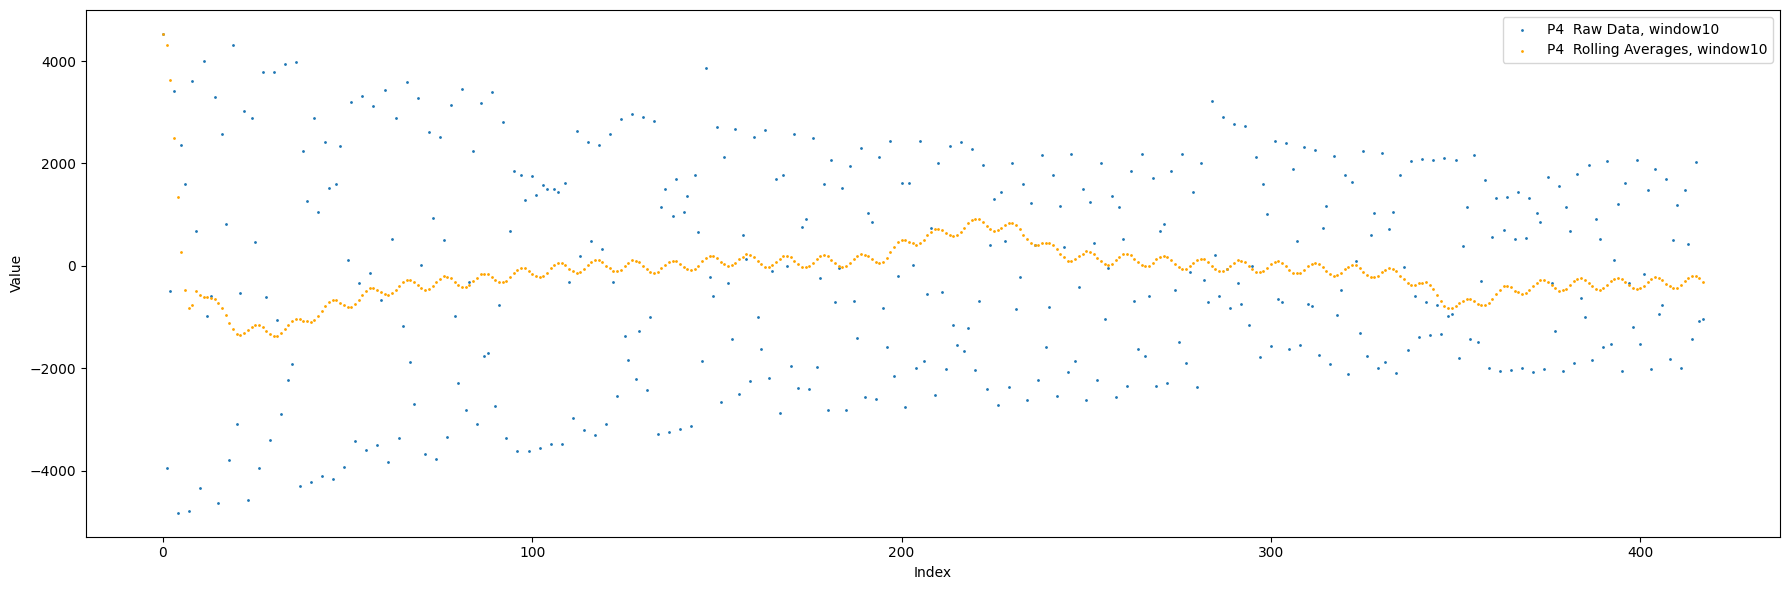

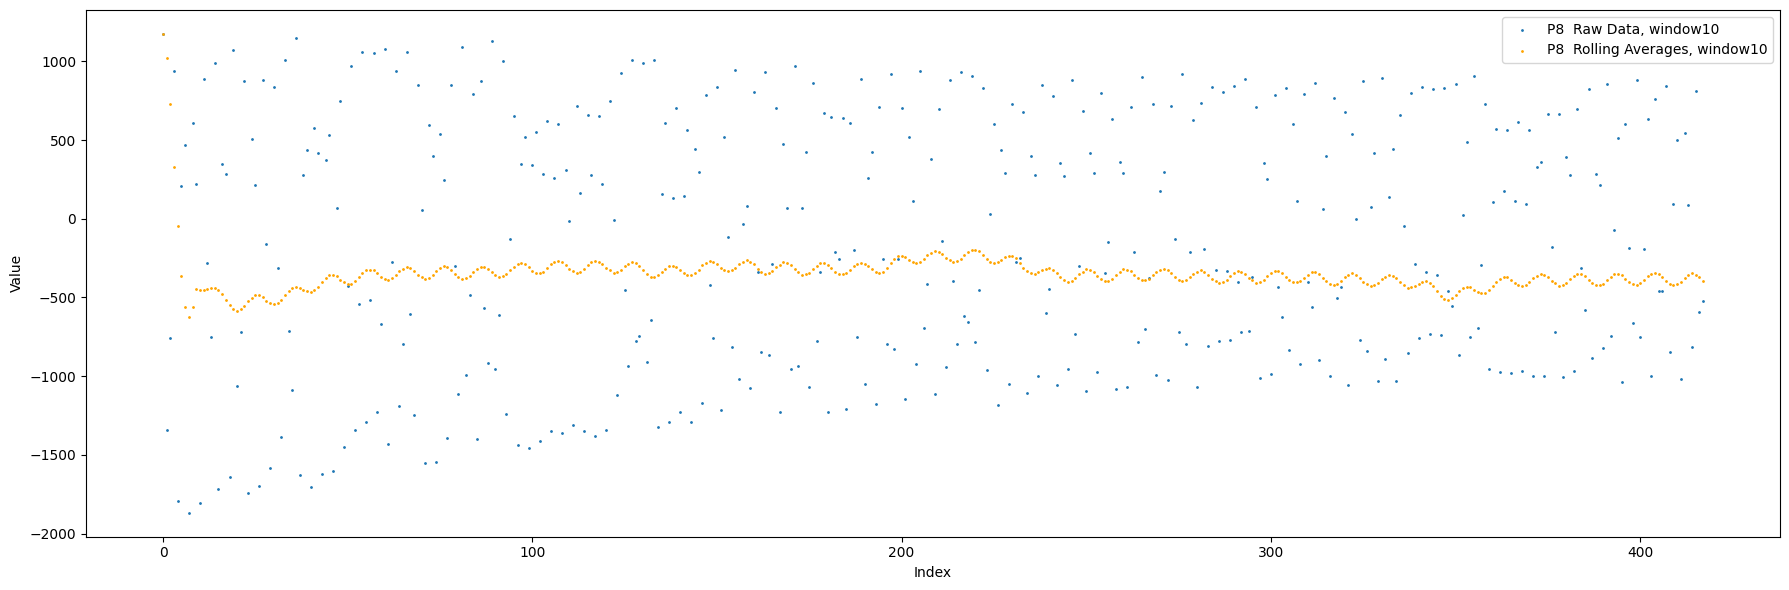

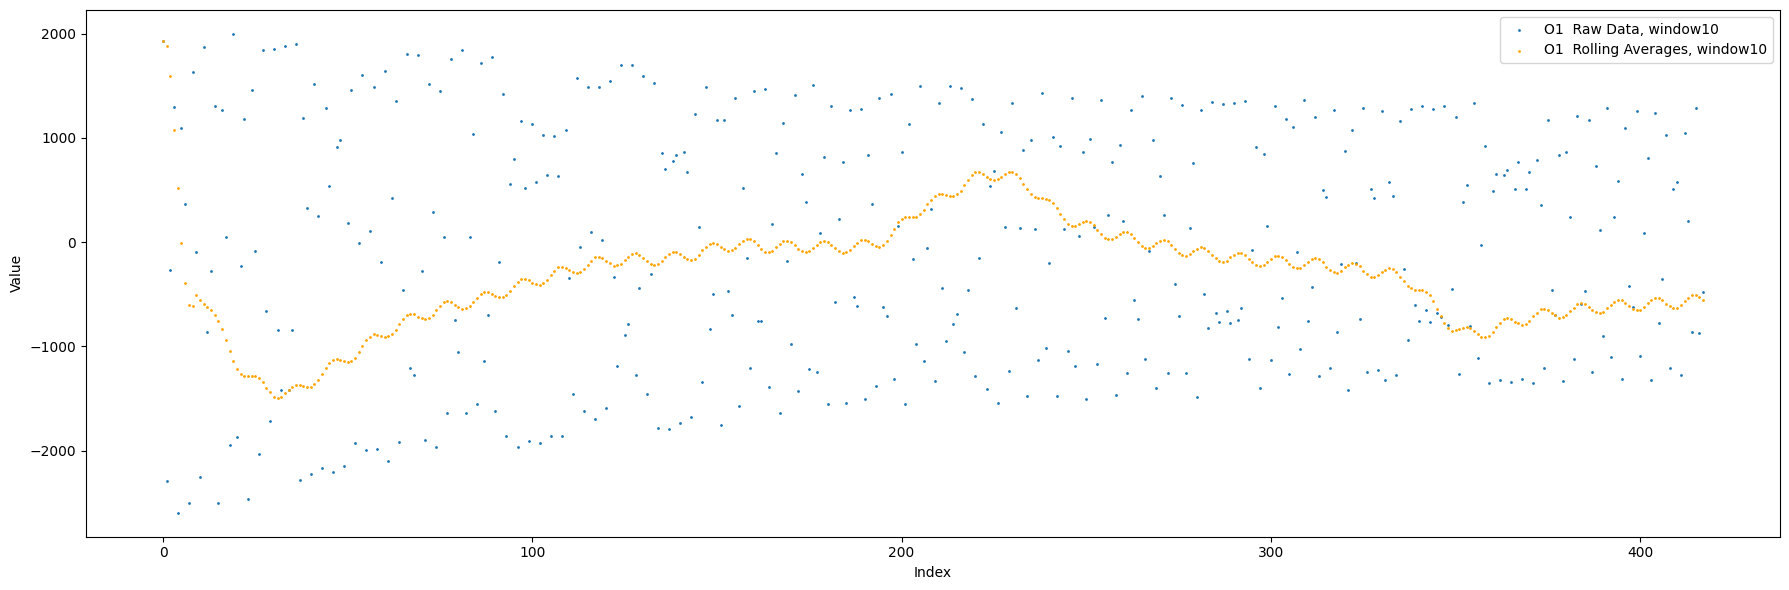

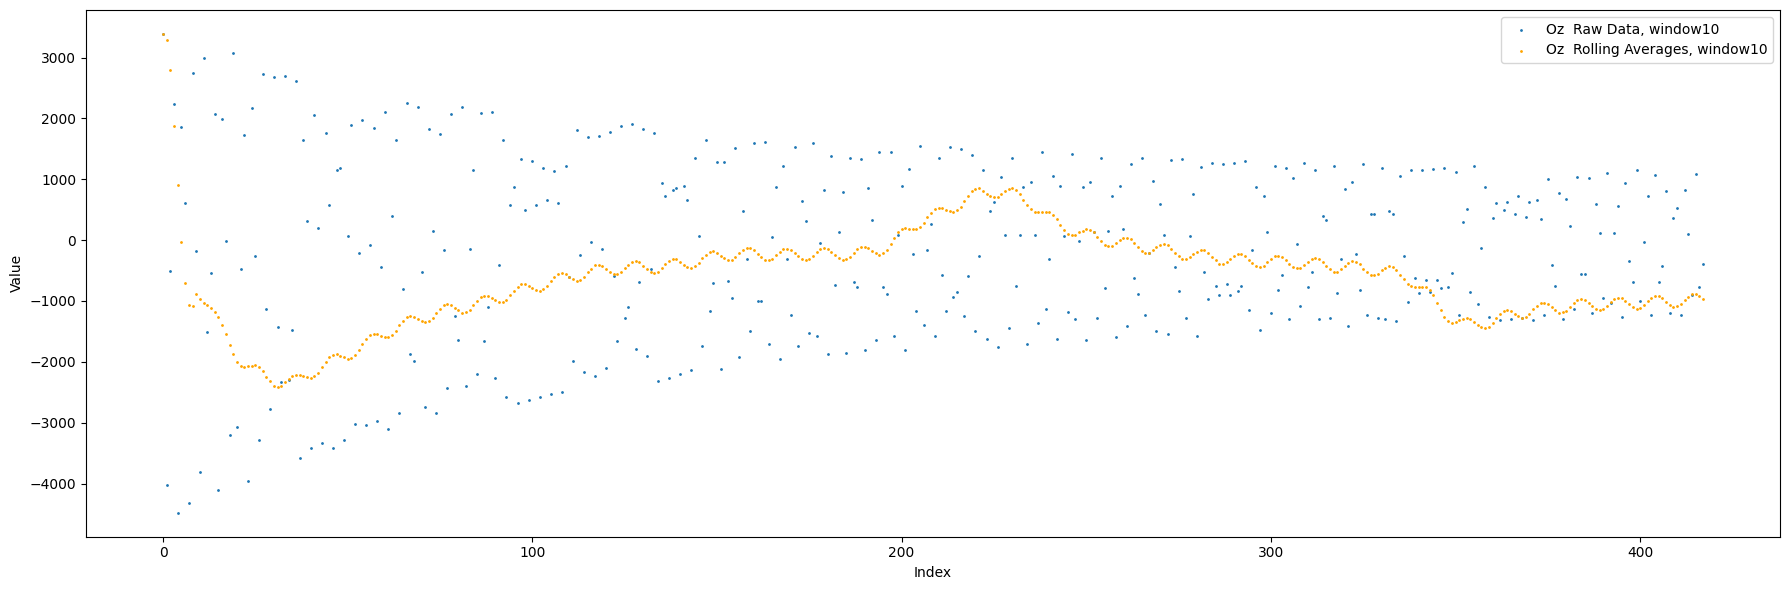

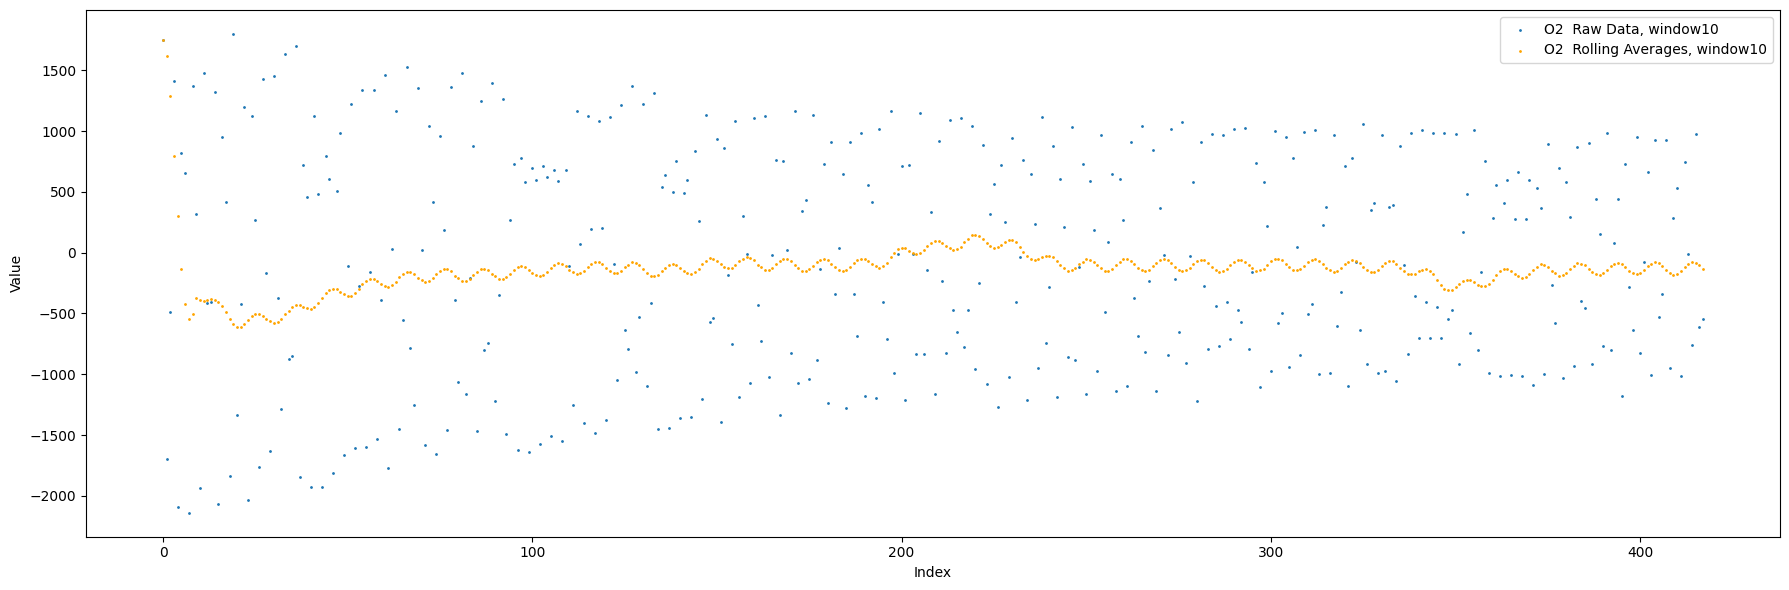

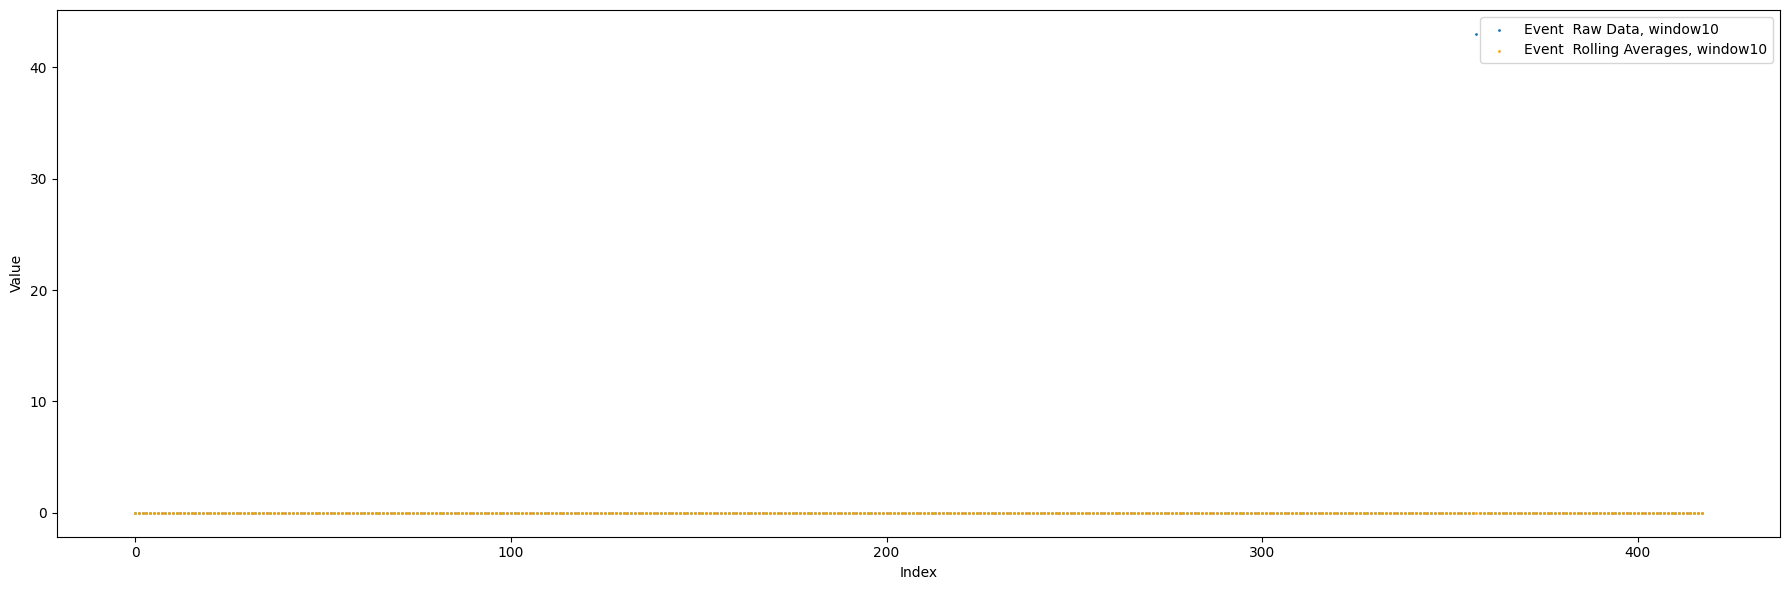

In [ ]:

for channel in labels[1:18]:

  fig, ax = plt.subplots(1, 1, figsize=(18, 6))

  # Scatter plot for Series A
  ax.scatter(s1_sparse.index, s1_sparse[channel], label=channel+'  Raw Data, window'+str(AVG_WINDOW), s=1)

  # Scatter plot for Series B
  ax.scatter(s1_sp_avgs.index, s1_sp_avgs[channel], label=channel+'  Rolling Averages, window'+str(AVG_WINDOW), color='orange', s=1)
  # Set the title and labels
  ax.set_xlabel('Index')
  ax.set_ylabel('Value')
  ax.legend()

  # Show the plot
  plt.tight_layout()
  plt.show()

In [ ]:
s1_sp_avgs.head(20)

,Time,Fp1,Fp2,F5,AFZ,F6,T7,Cz,T8,P7,P3,PZ,P4,P8,O1,Oz,O2,Event,Target
0,0.001953,271.400000,127.920000,965.870000,3392.000000,390.460000,1050.800000,9430.800000,-96.790000,298.020000,2148.200000,5633.500000,4530.500000,1174.000000,1932.500000,3387.900000,1749.200000,0.0,0
1,0.197270,234.975000,87.951500,903.475000,3252.200000,347.465000,915.765000,9983.900000,-203.990000,211.400000,1905.850000,5513.500000,4312.650000,1018.740000,1878.750000,3293.700000,1613.650000,0.0,0
2,0.392580,186.649667,41.670333,695.390000,2726.833333,217.201333,741.910000,9500.333333,-327.953333,108.997333,1471.463333,4786.333333,3627.433333,731.590000,1591.000000,2789.233333,1289.960000,0.0,0
3,0.587890,130.874750,-8.229750,351.390000,1831.577500,5.038500,551.364500,7914.625000,-449.475000,3.923000,877.217500,3457.217500,2498.292500,329.992500,1072.947500,1875.790000,792.242500,0.0,0
4,0.783200,85.242200,-45.801800,-2.448000,900.362000,-211.489200,403.841600,5880.800000,-530.294000,-70.783600,330.014000,2032.914000,1343.654000,-42.746000,522.478000,906.792000,305.194000,0.0,0
5,0.978520,50.286833,-71.558167,-334.456667,23.701667,-412.557667,294.703000,3683.633333,-581.555000,-121.076333,-140.555000,656.745000,270.495000,-363.788333,-9.085000,-28.190000,-135.488333,0.0,0
6,1.173800,34.164714,-79.938429,-566.091429,-590.912857,-550.492286,250.305286,1857.157143,-589.954286,-134.614000,-426.118571,-343.061429,-468.432857,-557.490000,-394.158571,-703.362857,-423.561429,0.0,0
7,1.369100,33.848250,-75.239625,-682.017500,-901.236250,-616.593250,259.028375,635.850000,-566.785000,-120.097750,-527.891250,-886.553750,-827.666250,-623.441250,-602.951250,-1068.067500,-548.728750,0.0,0
8,1.564500,47.947333,-59.959444,-670.826667,-875.867778,-604.098444,312.340778,203.877778,-518.634444,-84.106889,-449.081111,-911.636667,-774.577778,-561.040111,-611.167778,-1078.915556,-501.125556,0.0,0
9,1.759800,65.625600,-44.036700,-590.566000,-662.721000,-549.895200,370.703700,348.270000,-475.329000,-49.899200,-295.973000,-632.143000,-497.660000,-444.661100,-504.616000,-887.472000,-369.024000,0.0,0


In [ ]:
subject_1.head(20)

,Time,Fp1,Fp2,F5,AFZ,F6,T7,Cz,T8,P7,P3,PZ,P4,P8,O1,Oz,O2,Event,Target
0,0.001953,271.4000,127.920,965.87,3392.00,390.460,1050.800,9430.80,-96.790,298.020,2148.20,5633.50,4530.50,1174.000,1932.50,3387.90,1749.20,0,0
1,0.003906,198.5500,47.983,841.08,3112.40,304.470,780.730,10537.00,-311.190,124.780,1663.50,5393.50,4094.80,863.480,1825.00,3199.50,1478.10,0,0
2,0.005859,89.9990,-50.892,279.22,1676.10,-43.326,394.200,8533.20,-575.880,-95.808,602.69,3332.00,2257.00,157.290,1015.50,1780.30,642.58,0,0
3,0.007812,-36.4500,-157.930,-680.61,-854.19,-631.450,-20.272,3157.50,-814.040,-311.300,-905.52,-530.13,-889.13,-874.800,-481.21,-864.54,-700.91,0,0
4,0.009766,-97.2880,-196.090,-1417.80,-2824.50,-1077.600,-186.250,-2254.50,-853.570,-369.610,-1858.80,-3664.30,-3274.90,-1533.700,-1679.40,-2969.20,-1643.00,0,0
5,0.011719,-124.4900,-200.340,-1994.50,-4359.60,-1417.900,-250.990,-7302.20,-837.860,-372.540,-2493.40,-6224.10,-5095.30,-1969.000,-2666.90,-4703.10,-2338.90,0,0
6,0.013672,-62.5680,-130.220,-1955.90,-4278.60,-1378.100,-16.081,-9101.70,-640.350,-215.840,-2139.50,-6341.90,-4902.00,-1719.700,-2704.60,-4754.40,-2152.00,0,0
7,0.015625,31.6330,-42.348,-1493.50,-3073.50,-1079.300,320.090,-7913.30,-404.600,-18.484,-1240.30,-4691.00,-3342.30,-1085.100,-2064.50,-3621.00,-1424.90,0,0
8,0.017578,160.7400,62.282,-581.30,-672.92,-504.140,738.840,-3251.90,-133.430,203.820,181.40,-1112.30,-349.87,-61.831,-676.90,-1165.70,-120.30,0,0
9,0.019531,224.7300,99.268,131.78,1255.60,-62.066,895.970,1647.80,-85.580,257.970,1082.00,1883.30,1994.60,602.750,454.35,835.52,819.89,0,0
